In [13]:
import numpy as np
import matplotlib
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import load_model,Model
import math
import random

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [15]:
x_train = x_train.reshape(60000,784) # 将图片摊平，变成向量
x_test = x_test.reshape(10000,784) # 对测试集进行同样的处理

In [4]:
x_best=np.array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.46579213e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.71096554e-04, 0.00000000e+00, 4.49506713e-03, 0.00000000e+00,
       5.66382447e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.67657184e-01,
       0.00000000e+00, 0.00000000e+00, 4.19932806e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.00360227e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.24139884e-01, 0.00000000e+00, 0.00000000e+00,
       2.90019042e-02, 0.00000000e+00, 2.62874018e-04, 0.00000000e+00,
       0.00000000e+00, 6.64067446e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.15709263e-02, 0.00000000e+00,
       9.40422168e-01, 8.51308850e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.44103733e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.49173503e-03, 2.98725466e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.04331364e-04,
       1.08783334e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.88229020e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.58055635e-01, 9.84544289e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.62851585e-02, 0.00000000e+00,
       0.00000000e+00, 9.85098601e-01, 0.00000000e+00, 4.45557056e-02,
       0.00000000e+00, 0.00000000e+00, 4.26488885e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.96688515e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.71458844e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.86381708e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.14744527e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.05927209e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.97249218e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.25549919e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.92255096e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.19802923e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.08369366e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.86939062e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.50028104e-06, 3.28252901e-01, 1.39045401e-02,
       6.23529412e-01, 5.92156863e-01, 2.35294118e-01, 1.41176471e-01,
       0.00000000e+00, 4.68033609e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.53179120e-04, 0.00000000e+00,
       1.65885553e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.70588235e-01, 9.95564037e-01,
       9.52386323e-01, 9.96065416e-01, 9.96078431e-01, 9.45098039e-01,
       7.76470588e-01, 7.76470588e-01, 7.76470588e-01, 7.76470588e-01,
       7.76470588e-01, 7.76470588e-01, 7.76470588e-01, 8.04697011e-01,
       6.66666667e-01, 2.03921569e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.40495159e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.35117956e-03,
       0.00000000e+00, 0.00000000e+00, 3.20159117e-01, 4.47058824e-01,
       2.82352941e-01, 4.47058824e-01, 6.39215686e-01, 8.90196078e-01,
       9.96078431e-01, 8.82352941e-01, 9.96078431e-01, 4.95993609e-01,
       2.36729978e-01, 9.80392157e-01, 8.98039216e-01, 9.96078431e-01,
       9.96078431e-01, 6.69668329e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.06244336e-02, 0.00000000e+00, 1.45779230e-02,
       0.00000000e+00, 0.00000000e+00, 5.19269059e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.10260095e-03, 0.00000000e+00,
       1.68761037e-03, 0.00000000e+00, 0.00000000e+00, 6.66666667e-02,
       2.58823529e-01, 5.49019608e-02, 2.62745098e-01, 2.62745098e-01,
       2.62745098e-01, 2.31372549e-01, 8.37523110e-02, 2.86881110e-03,
       9.96078431e-01, 4.15686275e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.13758110e-03, 2.40590646e-03, 3.69659366e-02,
       0.00000000e+00, 1.54374353e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.92064483e-03,
       5.96781149e-04, 0.00000000e+00, 3.25490196e-01, 9.92156863e-01,
       8.19607843e-01, 7.05882353e-02, 5.12408144e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.17299034e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.02836915e-06,
       8.08306814e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.62745098e-02, 9.13725490e-01, 1.00000000e+00,
       3.25490196e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.96154632e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.78094269e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.43975089e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.69266385e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.94250275e-01, 0.00000000e+00, 1.07537992e-03,
       0.00000000e+00, 5.05882353e-01, 9.96078431e-01, 9.33333333e-01,
       1.72549828e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.64496634e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.81051947e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.05541600e-01, 9.82298935e-01,
       3.98626673e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.21779657e-01, 9.76470588e-01, 9.98883734e-01, 2.43137255e-01,
       0.00000000e+00, 0.00000000e+00, 1.09179652e-02, 6.33466836e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.24737161e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.98278793e-01, 0.00000000e+00, 0.00000000e+00,
       5.21568627e-01, 6.09461271e-03, 4.19955480e-03, 1.96078431e-02,
       3.36306618e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.05547119e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.04649617e-02, 0.00000000e+00, 4.19498481e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.10116266e-02, 9.95659696e-01, 0.00000000e+00, 3.60284134e-02,
       8.03921569e-01, 9.72549020e-01, 1.07350200e-02, 0.00000000e+00,
       2.12906050e-01, 2.48219209e-04, 0.00000000e+00, 6.09120279e-01,
       1.34819748e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.94378406e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.53654385e-03, 3.80979526e-04,
       9.79728150e-01, 0.00000000e+00, 0.00000000e+00, 1.29077499e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.94117647e-01,
       9.96078431e-01, 7.20377065e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.47464378e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.56049796e-01,
       0.00000000e+00, 1.84250922e-02, 0.00000000e+00, 0.00000000e+00,
       9.95758532e-01, 6.42139012e-04, 4.01300952e-03, 0.00000000e+00,
       1.64381433e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.94112118e-01, 9.84313725e-01,
       9.45828230e-01, 2.23529412e-01, 0.00000000e+00, 2.28754169e-02,
       0.00000000e+00, 2.75613726e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.65285053e-02, 0.00000000e+00, 3.21014386e-03, 2.56508898e-02,
       0.00000000e+00, 9.78258243e-01, 9.96893198e-01, 0.00000000e+00,
       0.00000000e+00, 2.15323556e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.45098039e-02, 8.52983864e-01, 9.96078431e-01,
       6.50980392e-01, 1.32317939e-02, 9.80209573e-01, 0.00000000e+00,
       0.00000000e+00, 9.96945841e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.36712987e-03, 0.00000000e+00, 0.00000000e+00,
       3.50174955e-05, 8.95568447e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.93599784e-01, 9.22745646e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.39533733e-02, 0.00000000e+00,
       1.78396762e-01, 7.96078431e-01, 9.96078431e-01, 8.58823529e-01,
       9.60831749e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.89743956e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.70217973e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.51030013e-02,
       1.49019608e-01, 9.96078431e-01, 9.50819506e-01, 3.01960784e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.62988525e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.47851828e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.65032916e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.49556890e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.21568627e-01,
       8.78431373e-01, 9.96078431e-01, 4.42807352e-01, 3.92156863e-03,
       9.73081884e-01, 0.00000000e+00, 9.97396466e-01, 0.00000000e+00,
       0.00000000e+00, 9.89316241e-01, 1.87511268e-04, 0.00000000e+00,
       9.37135110e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.83782271e-01, 0.00000000e+00, 0.00000000e+00, 5.21568627e-01,
       9.96078431e-01, 9.96078431e-01, 2.02832893e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.19452374e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.72386163e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.86803795e-01, 9.49805941e-01,
       9.96078431e-01, 9.96078431e-01, 2.03921569e-01, 4.43274538e-04,
       0.00000000e+00, 0.00000000e+00, 3.68809756e-02, 0.00000000e+00,
       0.00000000e+00, 1.27992068e-05, 0.00000000e+00, 0.00000000e+00,
       6.13051115e-02, 0.00000000e+00, 0.00000000e+00, 6.43504814e-03,
       1.28059494e-04, 4.56522532e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.77662310e-01, 9.96078431e-01,
       9.96078431e-01, 8.59031484e-01, 1.56862745e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.47295026e-04, 6.35183922e-03,
       0.00000000e+00, 2.59613987e-02, 0.00000000e+00, 0.00000000e+00,
       4.58193182e-03, 0.00000000e+00, 4.74509804e-01, 9.96078431e-01,
       8.11764706e-01, 7.05882353e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.69615248e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [5]:
#x_dif = x_best*255-x_test[0]
x_dif = x_best-x_test[0]/255
x_dif

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  5.46579213e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.71096554e-04,  0.00000000e+00,  4.49506713e-03,  0.00000000e+00,
        5.66382447e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.67657184e-01,
        0.00000000e+00,  0.00000000e+00,  4.19932806e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.00360227e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  5.24139884e-01,  0.00000000e+00,  0.00000000e+00,
        2.90019042e-02,  0.00000000e+00,  2.62874018e-04,  0.00000000e+00,
        0.00000000e+00,  6.64067446e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.15709263e-02,  0.00000000e+00,
        9.40422168e-01,  8.51308850e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [6]:
for i in range(784):
    if abs(x_dif[i]) < 1.00000000e-05:
        x_dif[i] = 0.00000000e+00
print(x_dif)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  5.46579213e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  4.71096554e-04  0.00000000e+00  4.49506713e-03  0.00000000e+00
  5.66382447e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.67657184e-01
  0.00000000e+00  0.00000000e+00  4.19932806e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.00360227e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.24139884e-01  0.00000000e+00  0.00000000e+00
  2.90019042e-02  0.00000000e+00  2.62874018e-04  0.00000000e+00
  0.00000000e+00  6.64067446e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.15709263e-02  0.00000000e+00
  9.40422168e-01  8.51308850e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  9.44103733e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.49173

In [7]:
# test
count = 0
for i in range(784):
    if x_dif[i] != 0:
        count+=1
print(count)

166


2


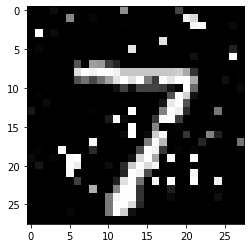

3


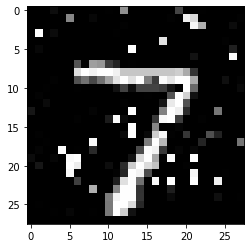

4


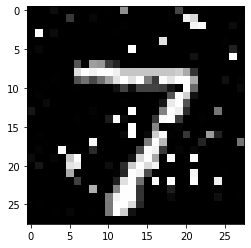

3


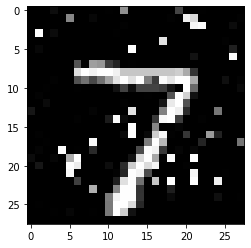

4


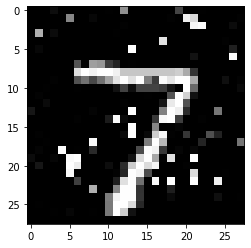

4


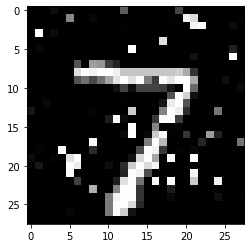

4


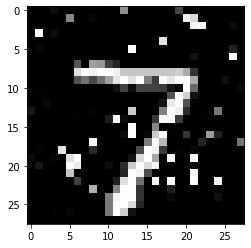

2


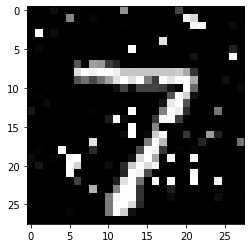

5


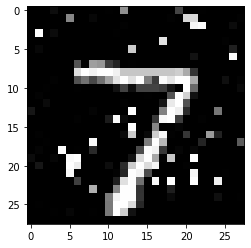

2


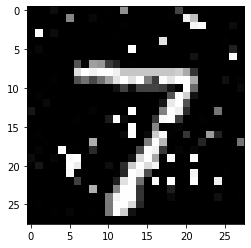

1


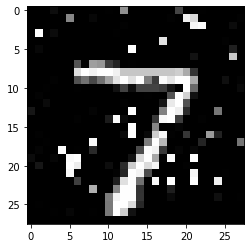

5


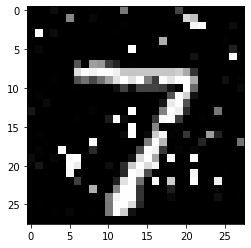

1


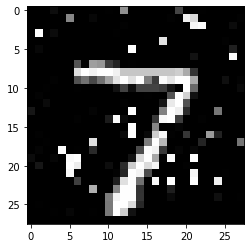

3


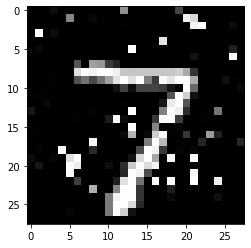

2


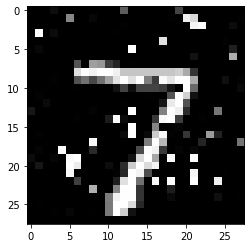

2


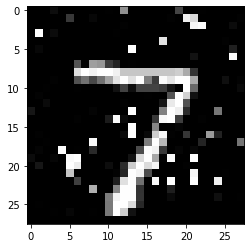

8


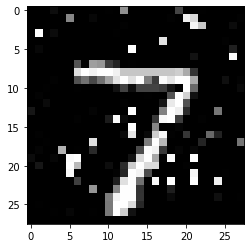

3


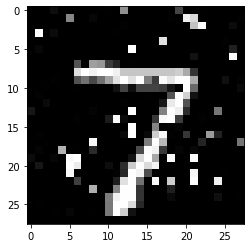

6


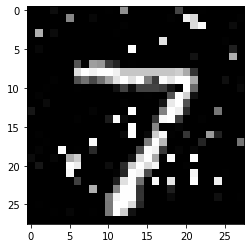

5


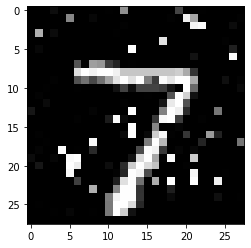

1


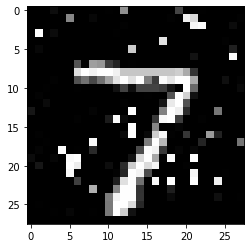

5


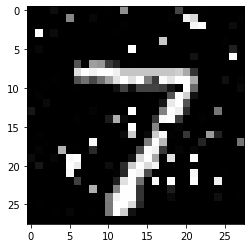

3


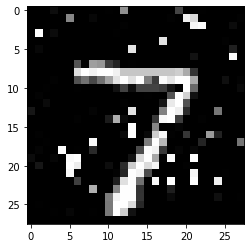

1


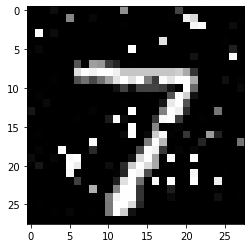

2


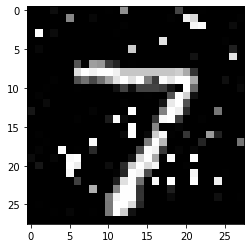

4


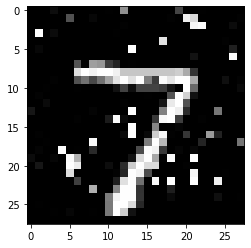

5


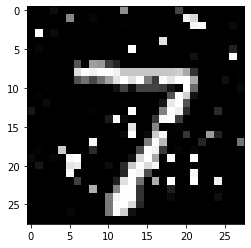

4


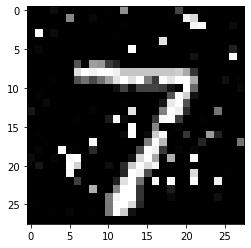

1


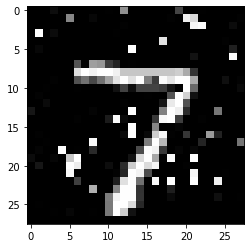

4


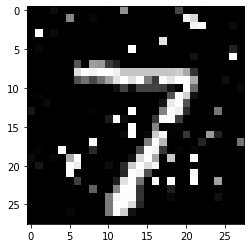

5


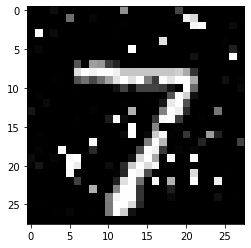

3


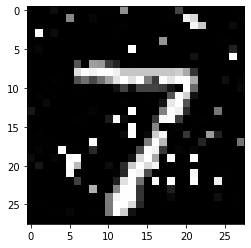

4


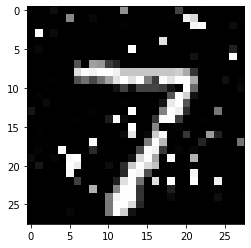

5


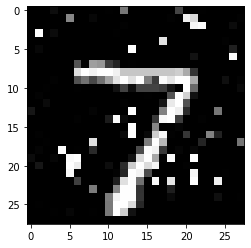

3


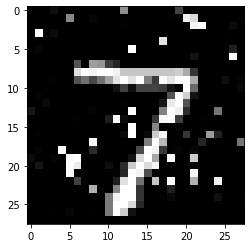

5


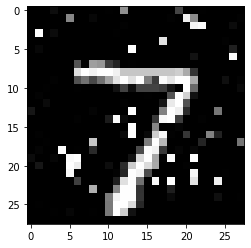

8


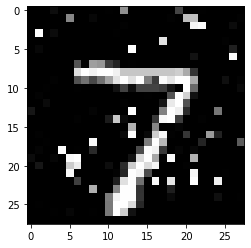

6


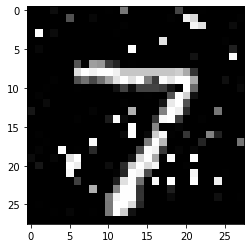

2


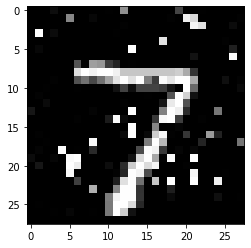

2


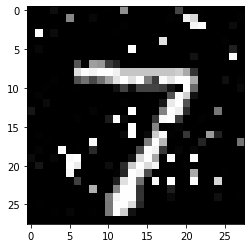

4


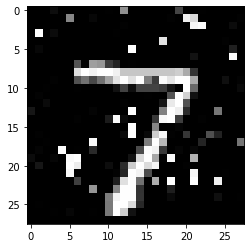

4


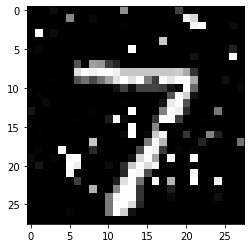

4


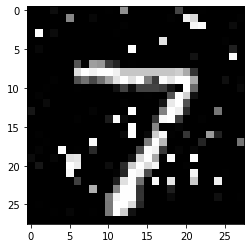

2


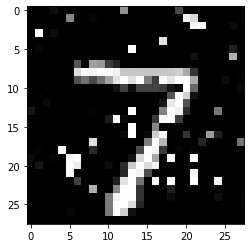

6


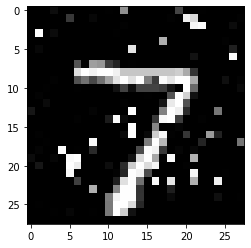

6


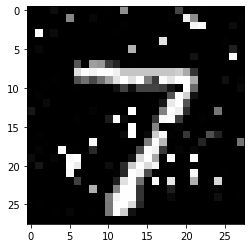

6


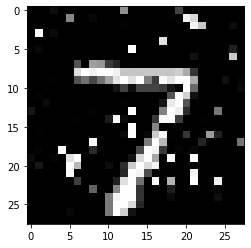

4


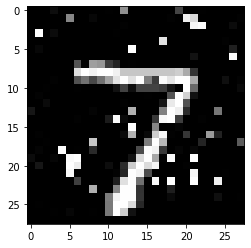

1


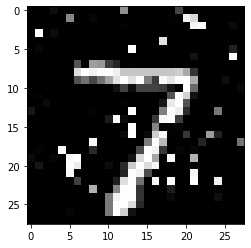

1


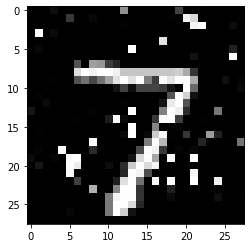

In [12]:
# 种群生成方法1
import copy
x_tmp = copy.deepcopy(x_dif)
x_des = []
for r in range(50):
    count = 0
    for k in range(784):
        if x_dif[k] > 0.3:
            x = random.randint(0,10000)/10000
            if x <= 0.1:
                x_tmp[k] -= random.randint(1,3)/10
                count += 1
    print(count)
    x_des.append(np.array(x_tmp.reshape(1,784)))
    x_re = x_tmp+x_test[0]/255
    re = x_re.reshape(28,28)
    plt.imshow(re,cmap='gray')
    plt.show()
    x_tmp = copy.deepcopy(x_dif)

106


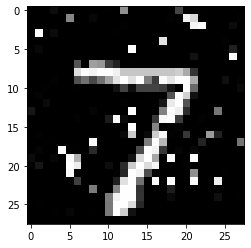

116


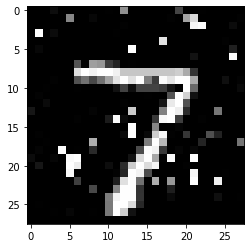

18


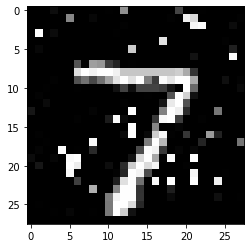

25


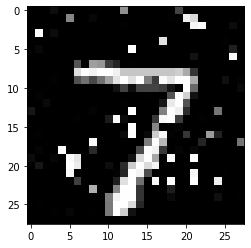

47


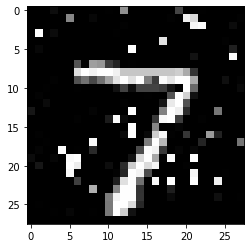

17


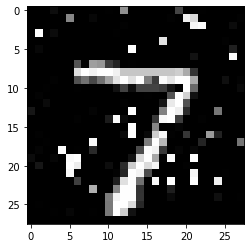

5


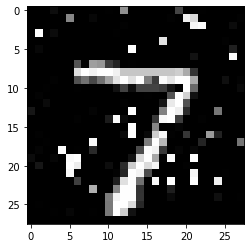

115


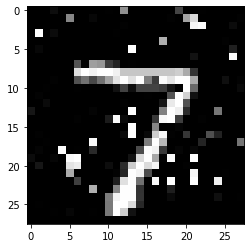

24


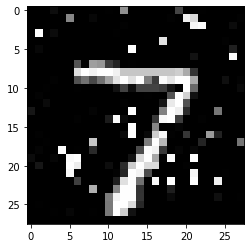

70


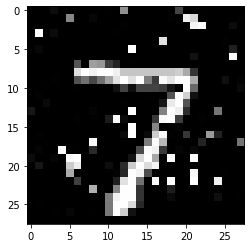

142


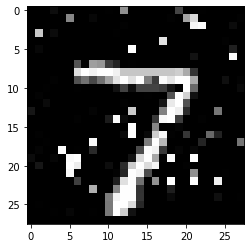

60


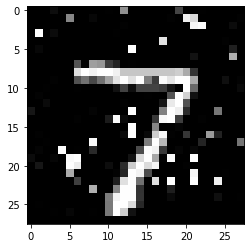

53


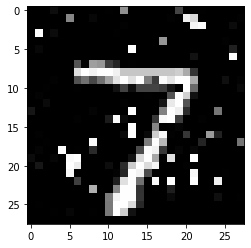

112


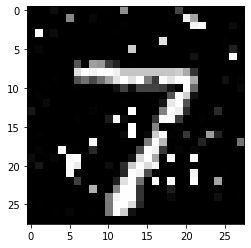

125


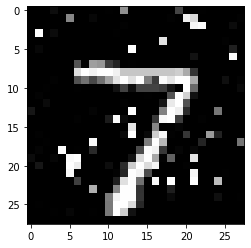

17


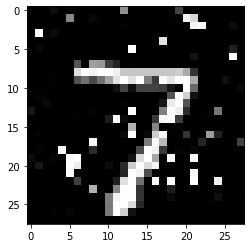

56


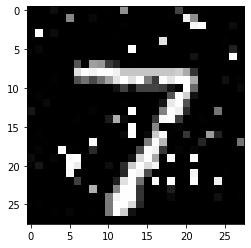

123


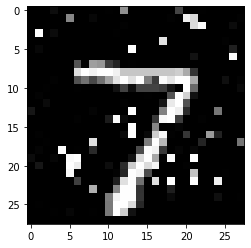

42


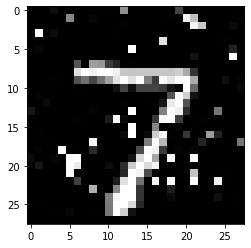

33


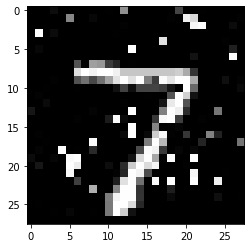

97


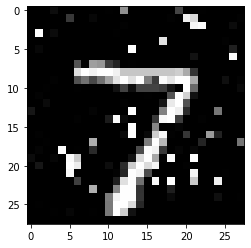

32


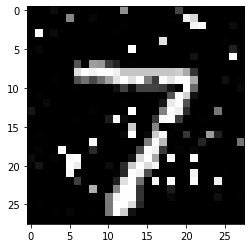

71


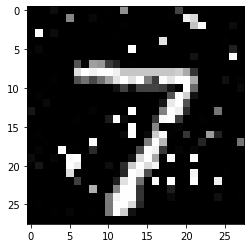

4


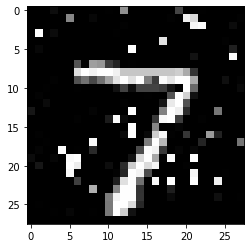

136


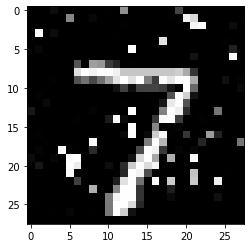

118


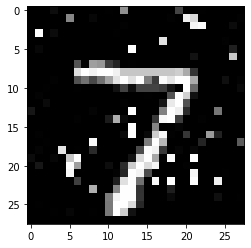

132


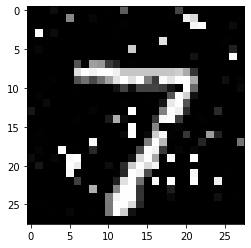

74


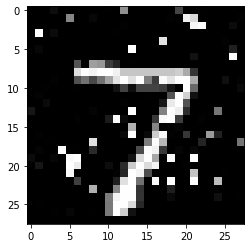

138


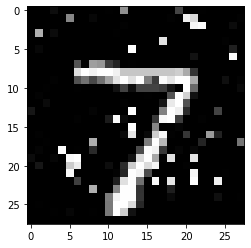

68


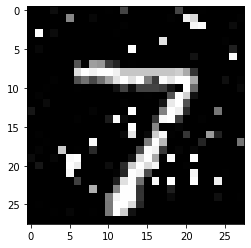

33


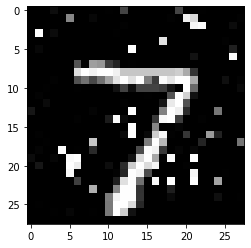

139


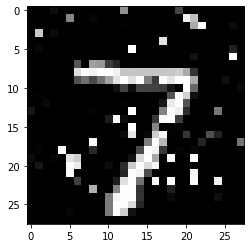

9


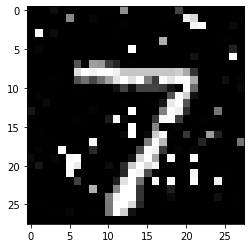

144


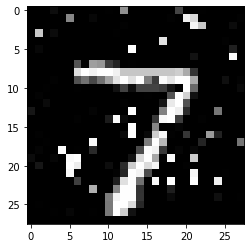

90


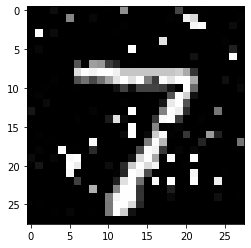

60


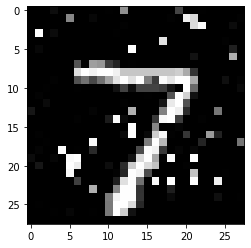

44


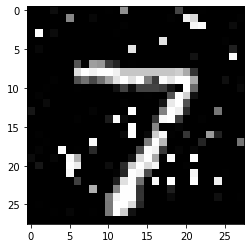

43


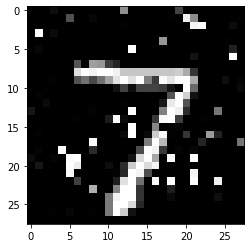

152


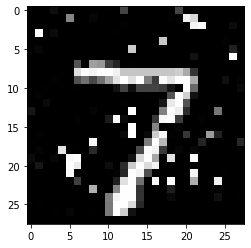

104


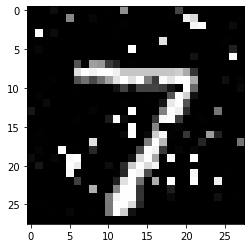

145


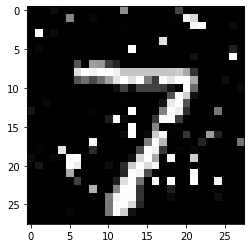

44


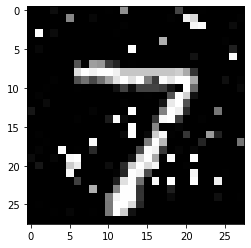

147


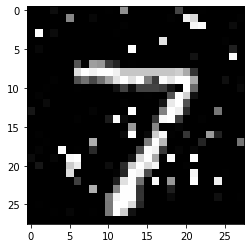

76


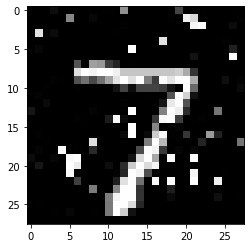

29


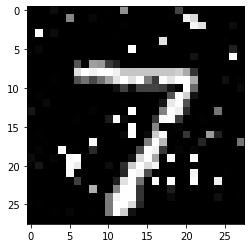

111


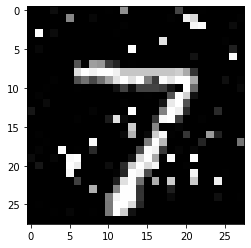

131


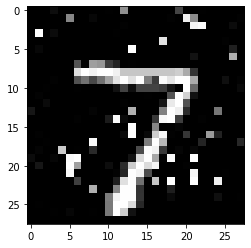

48


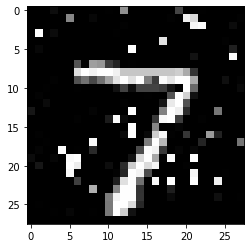

72


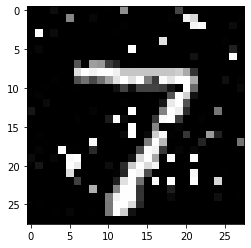

22


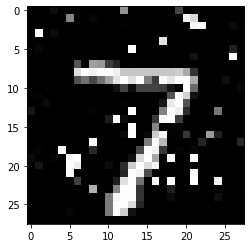

In [8]:
# 种群生成方法2
import copy
x_tmp = copy.deepcopy(x_dif)
x_des1 = []
for r in range(50):
    x = []
    L = random.randint(1,166)
    for i in range(L):
        x.append(random.randint(0,783))
        if x_tmp[x[i]] > 0.3:
            x_tmp[x[i]] -= random.randint(1,3)/10

    x_des1.append(np.array(x_tmp.reshape(1,784)))
    print(L)
    x_re = x_tmp+x_test[0]/255
    re = x_re.reshape(28,28)
    plt.imshow(re,cmap='gray')
    plt.show()
    x_tmp = copy.deepcopy(x_dif)

In [16]:
model = load_model('mnist_model.h5')

In [17]:
def Func(x):     # 将攻击点与原图结合
    d3 = x+x_test[0]/255
    result=model.predict(d3.reshape(1,784))
    return result[0][7]

In [18]:
def Dis(x):   # 扰动值
    res = 0
    for i in range(784):
        l = x[i]
        res += l**2
    return res

最优值： 0.21453327 扰动程度 28.764585037792603
最优值： 0.20183602 扰动程度 28.494314390463597
最优值： 0.24515915 扰动程度 27.5997277819612
最优值： 0.24569161 扰动程度 27.581825643751802
最优值： 0.24569161 扰动程度 27.581825643751802
最优值： 0.26556766 扰动程度 27.073537112116796
最优值： 0.26300618 扰动程度 26.92677051169651
最优值： 0.26923504 扰动程度 26.77881649558588
最优值： 0.24508125 扰动程度 26.32925562148831
最优值： 0.24508125 扰动程度 26.32925562148831
最优值： 0.26891854 扰动程度 25.923347964300017
最优值： 0.2725633 扰动程度 25.77712512986577
最优值： 0.27140367 扰动程度 25.737835459067128
最优值： 0.27181602 扰动程度 25.702401472228704
最优值： 0.29764453 扰动程度 25.268051690703555
最优值： 0.2980822 扰动程度 24.668133395896454
最优值： 0.3119659 扰动程度 24.64339921574308
最优值： 0.30923674 扰动程度 24.559323977071706
最优值： 0.31050882 扰动程度 24.44026698471957
最优值： 0.30998072 扰动程度 24.060684023588184
最优值： 0.321748 扰动程度 23.655331535877075
最优值： 0.31893703 扰动程度 23.735957320715904
最优值： 0.369293 扰动程度 23.34058532745152
最优值： 0.35249555 扰动程度 22.87656956299037
最优值： 0.35167256 扰动程度 22.912625739197455
最优值： 0.35521603 扰动

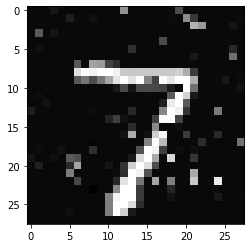

In [13]:
#1
MAX_GENERATION = 150  # 最大迭代次数
GENERATION = 0  # 当前代数
L = 784  # 种子的维度
N = 50  # 种群规模
SIGMA = 0.333  # 缩放因子
CR = 0.1  # 交叉概率
T = 1
G = np.zeros(T)
for k in range(T):
        GENERATION = 0  # 当前代数
        BEST_X = 0
        FITS = np.zeros(N)
        FITS_U = np.zeros(N)
        DIS = np.zeros(N)
        DIS_U = np.zeros(N)
        V = np.zeros((N, L))
        U = np.zeros((N, L))
        # 1、初始化
        X = np.concatenate(x_des, axis=0)
        # 找出随机生成的最好的种子
        for i in range(N):
            FITS[i] = Func(X[i])
        # 找出最好的种子 适应度值最小
        BEST_X = X[np.argmin(FITS)]
        while GENERATION < MAX_GENERATION:       
            # 2、变异
            for i in range(N):
                r = np.random.randint(1, N, 2)
                # 变异向量V[i, :]
                # 变异向量的基使用每次适应度值最好的个体BEST_X
                # V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :]) + SIGMA * (X[r[2], :] - X[r[3], :])
                # V[i, :] = BEST_X + SIGMA * ((X[r[0], :] - X[r[1], :]) + (X[r[2], :] - X[r[3], :]))
                # SIGMA过大 无法收敛
                # SIGMA过小 早熟
                V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :])
                for j in range(784):
                    if V[i, j] > 1:
                        #print(V[i, j])
                        V[i, j] = 1-(V[i, j]-1)
                        #print(V[i, j])
            # print(V)
            # 3、交叉操作
            for i in range(N):
                jRand = np.floor(np.random.random() * L)
                for j in range(L):
                    # 至少有一个分量对U[i,j]作出了贡献
                    # CR调小 有利于往BEST_X的方向进化
                    if np.random.random() > CR or j == jRand:
                        U[i, j] = X[i, j]
                    else:
                        U[i, j] = V[i, j]
                    #if np.random.random() < CR or j == jRand:
                        #U[i, j] = V[i, j]
                    #else:
                        #U[i, j] = X[i, j]
            # 4、计算适应度值+选择操作
            for i in range(N):
                FITS[i] = Func(X[i])
                FITS_U[i] = Func(U[i])
                DIS[i] = Dis(X[i])
                DIS_U[i] = Dis(U[i])
                # 变异的种子表现更好
                #if FITS[i] >= FITS_U[i] and DIS[i] >= DIS_U[i]:
                if DIS[i] >= DIS_U[i]:
                    X[i, :] = U[i, :]
                    FITS[i] = FITS_U[i]
                    # 是否比BEST_X适应度值更小
                    #if FITS_U[i] < Func(BEST_X) and DIS_U[i] < Dis(BEST_X):
                    if DIS_U[i] < Dis(BEST_X):
                        BEST_X = U[i, :]
            GENERATION += 1
            print("最优值：", Func(BEST_X),"扰动程度",Dis(BEST_X))
        if GENERATION == MAX_GENERATION:
            BEST = BEST_X+x_test[0]/255
            print(BEST_X)
            plt.imshow(BEST.reshape(28,28),cmap='gray')
            plt.show()
            break

最优值： 0.22404997 扰动程度 28.169120159792605
最优值： 0.22649483 扰动程度 27.868901298050403
最优值： 0.22692564 扰动程度 27.804280046521203
最优值： 0.22692564 扰动程度 27.804280046521203
最优值： 0.22692564 扰动程度 27.804280046521203
最优值： 0.24905427 扰动程度 27.734127986824205
最优值： 0.25748032 扰动程度 27.365575497118744
最优值： 0.28001806 扰动程度 27.170578040361185
最优值： 0.2871664 扰动程度 27.081834170987
最优值： 0.29162744 扰动程度 26.9711854017158
最优值： 0.2531252 扰动程度 26.751101386520567
最优值： 0.29480082 扰动程度 26.223946337451633
最优值： 0.31156906 扰动程度 25.627329928594154
最优值： 0.31149566 扰动程度 25.643158903270862
最优值： 0.31492594 扰动程度 25.47480777394885
最优值： 0.3099724 扰动程度 25.24341427742928
最优值： 0.30826995 扰动程度 24.900869358202883
最优值： 0.30888087 扰动程度 24.92201093913507
最优值： 0.33807003 扰动程度 24.458630696943004
最优值： 0.33639446 扰动程度 24.54209050010277
最优值： 0.33764747 扰动程度 24.080097051698562
最优值： 0.34118104 扰动程度 23.915027337440566
最优值： 0.37426662 扰动程度 23.783477939254198
最优值： 0.3702818 扰动程度 23.363908518082955
最优值： 0.38184118 扰动程度 23.153494085642006
最优值： 0.456127

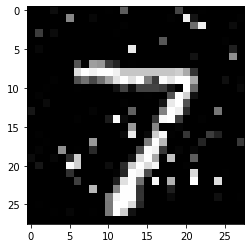

In [12]:
#2
MAX_GENERATION = 50  # 最大迭代次数
GENERATION = 0  # 当前代数
L = 784  # 种子的维度
N = 50  # 种群规模
SIGMA = 0.333  # 缩放因子
CR = 0.1  # 交叉概率
T = 1
G = np.zeros(T)
for k in range(T):
        GENERATION = 0  # 当前代数
        BEST_X_2 = 0
        FITS = np.zeros(N)
        FITS_U = np.zeros(N)
        DIS = np.zeros(N)
        DIS_U = np.zeros(N)
        V = np.zeros((N, L))
        U = np.zeros((N, L))
        # 1、初始化
        X = np.concatenate(x_des1, axis=0)
        # 找出随机生成的最好的种子
        for i in range(N):
            FITS[i] = Func(X[i])
        # 找出最好的种子 适应度值最小
        BEST_X_2 = X[np.argmin(FITS)]
        while GENERATION < MAX_GENERATION:       
            # 2、变异
            for i in range(N):
                r = np.random.randint(1, N, 2)
                # 变异向量V[i, :]
                # 变异向量的基使用每次适应度值最好的个体BEST_X
                # V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :]) + SIGMA * (X[r[2], :] - X[r[3], :])
                # V[i, :] = BEST_X + SIGMA * ((X[r[0], :] - X[r[1], :]) + (X[r[2], :] - X[r[3], :]))
                # SIGMA过大 无法收敛
                # SIGMA过小 早熟
                V[i, :] = BEST_X_2 + SIGMA * (X[r[0], :] - X[r[1], :])
                for j in range(784):
                    if V[i, j] > 1:
                        #print(V[i, j])
                        V[i, j] = 1-(V[i, j]-1)
                        #print(V[i, j])
            # print(V)
            # 3、交叉操作
            for i in range(N):
                jRand = np.floor(np.random.random() * L)
                for j in range(L):
                    # 至少有一个分量对U[i,j]作出了贡献
                    # CR调小 有利于往BEST_X的方向进化
                    if np.random.random() > CR or j == jRand:
                        U[i, j] = X[i, j]
                    else:
                        U[i, j] = V[i, j]
                    #if np.random.random() < CR or j == jRand:
                        #U[i, j] = V[i, j]
                    #else:
                        #U[i, j] = X[i, j]
            # 4、计算适应度值+选择操作
            for i in range(N):
                FITS[i] = Func(X[i])
                FITS_U[i] = Func(U[i])
                DIS[i] = Dis(X[i])
                DIS_U[i] = Dis(U[i])
                # 变异的种子表现更好
                #if FITS[i] >= FITS_U[i] and DIS[i] >= DIS_U[i]:
                if DIS[i] >= DIS_U[i]:
                    X[i, :] = U[i, :]
                    FITS[i] = FITS_U[i]
                    # 是否比BEST_X_2适应度值更小
                    #if FITS_U[i] < Func(BEST_X) and DIS_U[i] < Dis(BEST_X):
                    if DIS_U[i] < Dis(BEST_X):
                        BEST_X_2 = U[i, :]
            GENERATION += 1
            print("最优值：", Func(BEST_X_2),"扰动程度",Dis(BEST_X_2))
        if GENERATION == MAX_GENERATION:
            BEST_2 = BEST_X_2+x_test[0]/255
            print(BEST_X_2)
            plt.imshow(BEST_2.reshape(28,28),cmap='gray')
            plt.show()
            break

In [14]:
BEST_X

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  5.46579213e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.71096554e-04,  0.00000000e+00,  4.49506713e-03,  0.00000000e+00,
        5.56061765e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.67657184e-01,
        0.00000000e+00,  0.00000000e+00,  4.19932806e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.00360227e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  8.79813943e-02,  0.00000000e+00,  0.00000000e+00,
        2.90019042e-02,  0.00000000e+00,  2.62874018e-04,  0.00000000e+00,
        0.00000000e+00,  6.64067446e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.15709263e-02,  0.00000000e+00,
        5.33211688e-01,  1.95239476e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [4]:
BEST_X=np.array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  5.46579213e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.71096554e-04,  0.00000000e+00,  4.49506713e-03,  0.00000000e+00,
        5.56061765e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.67657184e-01,
        0.00000000e+00,  0.00000000e+00,  4.19932806e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.00360227e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  8.79813943e-02,  0.00000000e+00,  0.00000000e+00,
        2.90019042e-02,  0.00000000e+00,  2.62874018e-04,  0.00000000e+00,
        0.00000000e+00,  6.64067446e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.15709263e-02,  0.00000000e+00,
        5.33211688e-01,  1.95239476e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  9.44103733e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.49173503e-03,  2.98725466e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.04331364e-04,
        1.08783334e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  3.88229020e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  6.84822208e-01,  5.86973577e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  4.62851585e-02,  0.00000000e+00,
        0.00000000e+00,  3.38213723e-01,  0.00000000e+00,  4.45557056e-02,
        0.00000000e+00,  0.00000000e+00,  4.26488885e-04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  4.96688515e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.71458844e-05,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.66831959e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.14744527e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  3.05927209e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.64590735e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.25549919e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  7.92255096e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.19802923e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  7.08369366e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  4.15109356e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.15886371e-03, -7.11585656e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  4.68033609e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  4.53179120e-04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -5.14394373e-04,
       -4.36921084e-02, -1.30153725e-05,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.82264228e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.40495159e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  8.35117956e-03,
        0.00000000e+00,  0.00000000e+00,  5.74140190e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -5.00084822e-01,
       -7.59348453e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.20648721e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  6.06244336e-02,  0.00000000e+00,  1.45779230e-02,
        0.00000000e+00,  0.00000000e+00,  5.19269059e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  4.10260095e-03,  0.00000000e+00,
        1.68761037e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.39936982e-03, -9.22621385e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.13758110e-03,  2.40590646e-03,  3.69659366e-02,
        0.00000000e+00,  1.54374353e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.92064483e-03,
        5.96781149e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  5.12408144e-04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  4.17299034e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        8.08306814e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.96154632e-05,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        8.78094269e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        7.43975089e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.69266385e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.30279675e-01,  0.00000000e+00,  1.07537992e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.59031173e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  9.81051947e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.05541600e-01,  2.23972622e-01,
        3.98626673e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -9.59289202e-03,  0.00000000e+00,  2.80530263e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.09179652e-02,  6.33466836e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.24737161e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.40757074e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -9.89983819e-01, -7.29133779e-01,  0.00000000e+00,
        3.36306618e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  4.05547119e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.04649617e-02,  0.00000000e+00,  4.19498481e-05,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.10116266e-02,  6.62393257e-01,  0.00000000e+00,  7.34295753e-04,
        0.00000000e+00,  0.00000000e+00, -2.16715960e-01,  0.00000000e+00,
        2.12906050e-01,  2.48219209e-04,  0.00000000e+00,  8.26793518e-03,
        1.34819748e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  6.94378406e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.53654385e-03,  3.80979526e-04,
       -1.44947896e-02,  0.00000000e+00,  0.00000000e+00,  1.29077499e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  6.65157480e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.47464378e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  4.22126653e-01,
        0.00000000e+00,  1.84250922e-02,  0.00000000e+00,  0.00000000e+00,
        3.41808769e-02,  6.42139012e-04,  4.01300952e-03,  0.00000000e+00,
        1.64381433e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.65175941e-03,  0.00000000e+00,  0.00000000e+00,  2.28754169e-02,
        0.00000000e+00,  2.75613726e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.65285053e-02,  0.00000000e+00,  3.21014386e-03,  2.56508898e-02,
        0.00000000e+00,  3.33025226e-01,  2.88402544e-01,  0.00000000e+00,
        0.00000000e+00,  2.15323556e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.36828027e-02,  0.00000000e+00,
        0.00000000e+00,  1.32317939e-02,  8.36433863e-01,  0.00000000e+00,
        0.00000000e+00,  1.75906139e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  3.36712987e-03,  0.00000000e+00,  0.00000000e+00,
        3.50174955e-05,  8.95568447e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.25407830e-01,  6.29607315e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  5.39533733e-02,  0.00000000e+00,
        1.66632056e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.39680294e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        7.89743956e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  4.76458390e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.51030013e-02,
        0.00000000e+00,  0.00000000e+00, -4.52589254e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  6.53793841e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  4.47851828e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  3.65032916e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.49556890e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -8.17304016e-03,  0.00000000e+00,
        6.28943187e-01,  0.00000000e+00,  4.80480631e-01,  0.00000000e+00,
        0.00000000e+00,  7.79410295e-01,  1.87511268e-04,  0.00000000e+00,
        9.14551014e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -3.76516413e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.08867563e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.19452374e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.72386163e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.47588109e-01,  7.86333157e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  4.43274538e-04,
        0.00000000e+00,  0.00000000e+00,  3.68809756e-02,  0.00000000e+00,
        0.00000000e+00,  1.27992068e-05,  0.00000000e+00,  0.00000000e+00,
        6.13051115e-02,  0.00000000e+00,  0.00000000e+00,  6.43504814e-03,
        1.28059494e-04,  4.56522532e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  3.15250608e-03,  0.00000000e+00,
        0.00000000e+00,  2.07954588e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  7.47295026e-04,  6.35183922e-03,
        0.00000000e+00,  2.59613987e-02,  0.00000000e+00,  0.00000000e+00,
        4.58193182e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.69615248e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

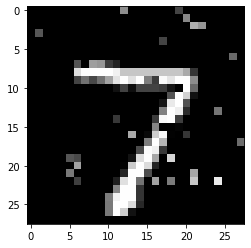

置信度： 0.94847864
[1.0079391e-03 2.9704970e-04 1.6817518e-02 2.8636009e-02 5.8001504e-05
 2.1213521e-03 6.8512568e-06 9.4847864e-01 1.1658662e-03 1.4107741e-03]


In [11]:
#过滤
import copy
x_f = copy.deepcopy(BEST_X)
for i in range(784):
    if abs(x_f[i]) < 0.2:
        x_f[i] = 0
f = x_f+x_test[0]/255
plt.imshow(f.reshape(28,28),cmap='gray')
plt.show()
result=model.predict(f.reshape(1,784))
print("置信度：", result[0][7])
print(result[0])

迭代: 1
置信度： 0.9478648


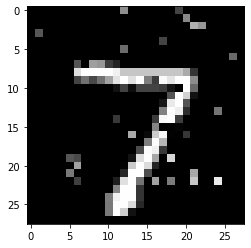

迭代: 2
置信度： 0.94759035


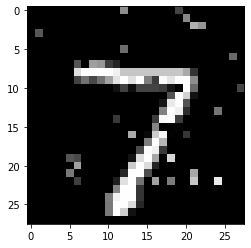

迭代: 3
置信度： 0.94724065


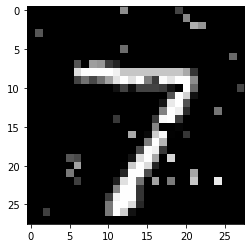

迭代: 4
置信度： 0.9465366


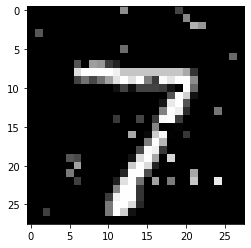

迭代: 5
置信度： 0.94601613


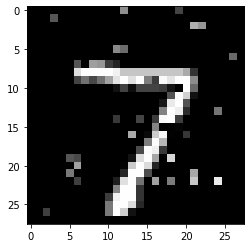

迭代: 6
置信度： 0.94301206


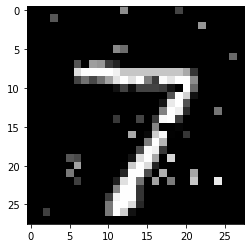

迭代: 7
置信度： 0.9411744


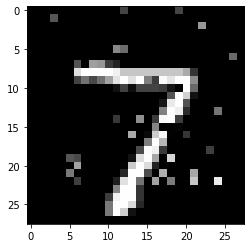

迭代: 8
置信度： 0.9384067


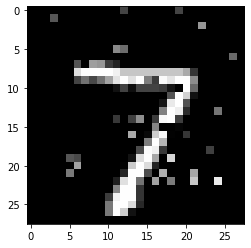

迭代: 9
置信度： 0.93689305


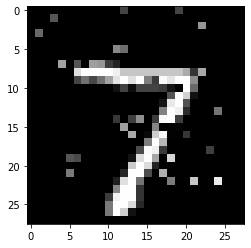

迭代: 10
置信度： 0.9352399


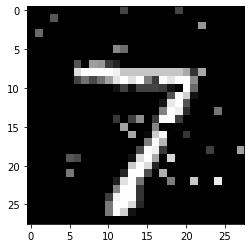

迭代: 11
置信度： 0.93466085


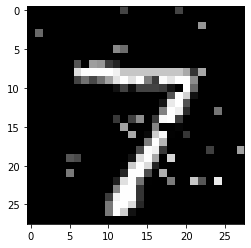

迭代: 12
置信度： 0.93263626


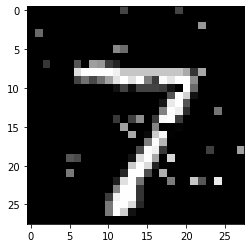

迭代: 13
置信度： 0.93098783


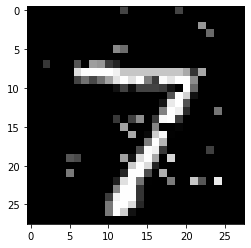

迭代: 14
置信度： 0.92890966


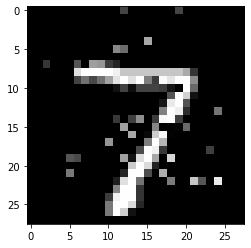

迭代: 15
置信度： 0.9283074


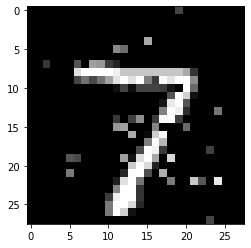

迭代: 16
置信度： 0.9244294


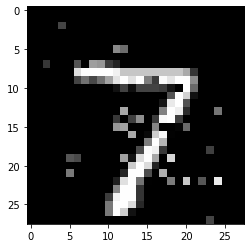

迭代: 17
置信度： 0.9081656


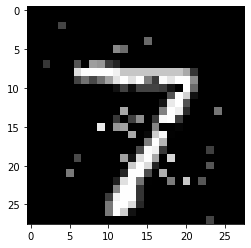

迭代: 18
置信度： 0.9062315


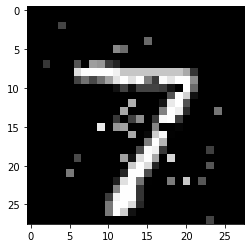

迭代: 19
置信度： 0.90500814


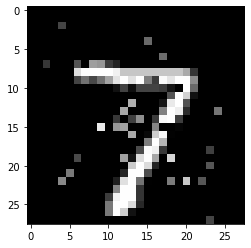

迭代: 20
置信度： 0.901407


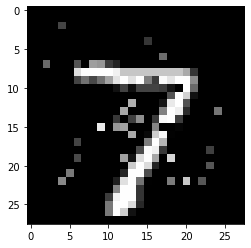

迭代: 21
置信度： 0.89967686


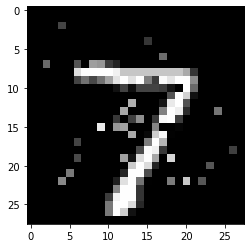

迭代: 22
置信度： 0.89152


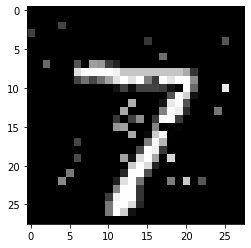

迭代: 23
置信度： 0.88787574


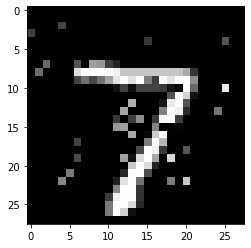

迭代: 24
置信度： 0.8847157


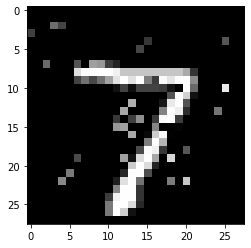

迭代: 25
置信度： 0.8791706


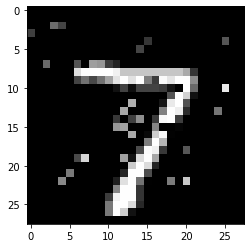

迭代: 26
置信度： 0.87522024


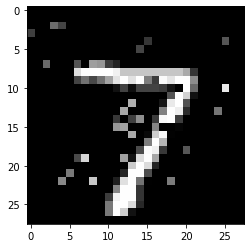

迭代: 27
置信度： 0.8708966


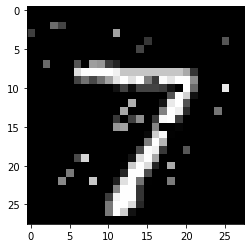

迭代: 28
置信度： 0.87046134


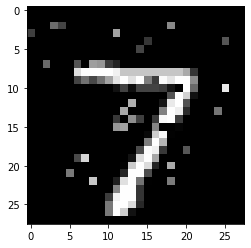

迭代: 29
置信度： 0.860361


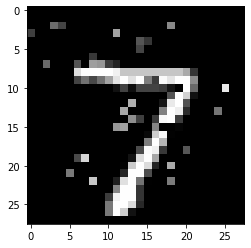

迭代: 30
置信度： 0.8481921


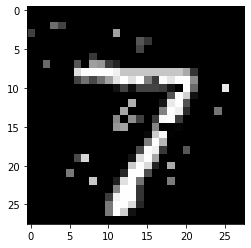

迭代: 31
置信度： 0.8467051


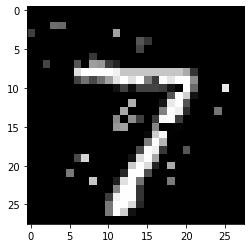

迭代: 32
置信度： 0.84302163


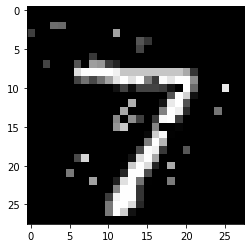

迭代: 33
置信度： 0.83737963


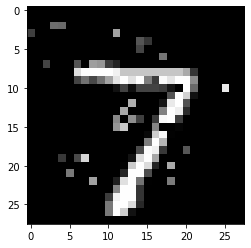

迭代: 34
置信度： 0.82431924


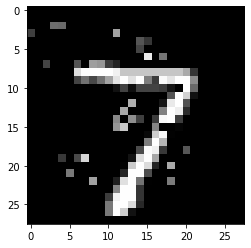

迭代: 35
置信度： 0.8114156


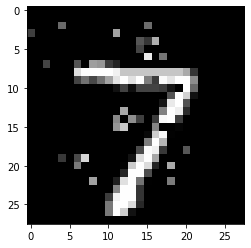

迭代: 36
置信度： 0.8059516


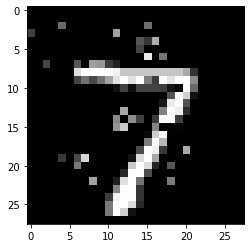

迭代: 37
置信度： 0.7761031


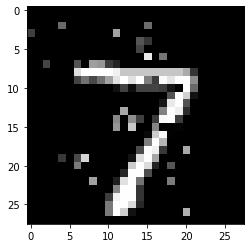

迭代: 38
置信度： 0.7718364


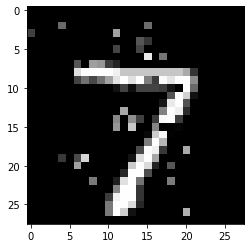

迭代: 39
置信度： 0.7590377


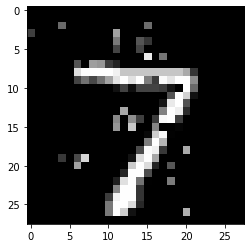

迭代: 40
置信度： 0.7559882


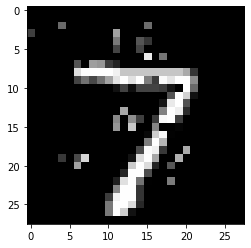

迭代: 41
置信度： 0.7534437


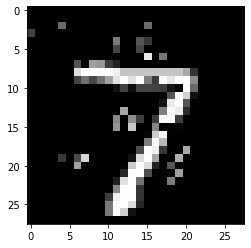

迭代: 42
置信度： 0.75102204


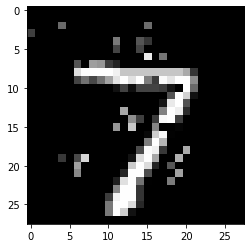

迭代: 43
置信度： 0.7502619


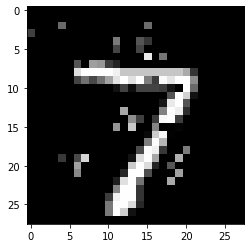

迭代: 44
置信度： 0.74572986


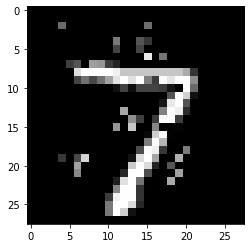

迭代: 45
置信度： 0.7355715


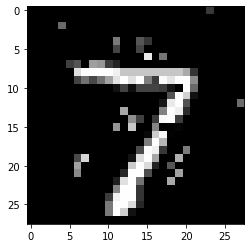

迭代: 46
置信度： 0.7305406


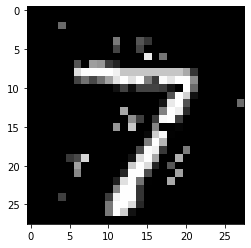

迭代: 47
置信度： 0.69557273


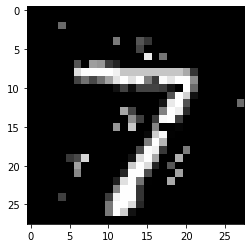

迭代: 48
置信度： 0.6755245


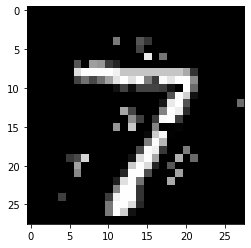

迭代: 49
置信度： 0.67286694


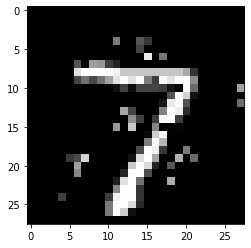

迭代: 50
置信度： 0.6704338


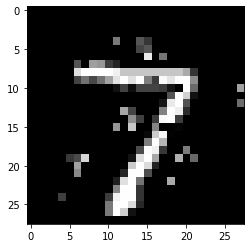

迭代: 51
置信度： 0.64880836


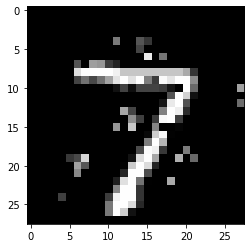

迭代: 52
置信度： 0.6311464


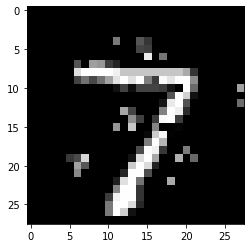

迭代: 53
置信度： 0.62611777


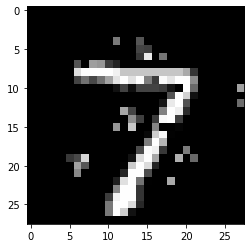

迭代: 54
置信度： 0.6229984


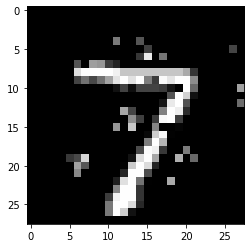

迭代: 55
置信度： 0.61907357


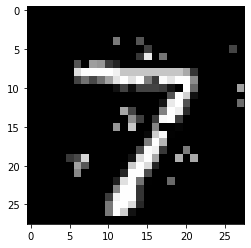

迭代: 56
置信度： 0.6163436


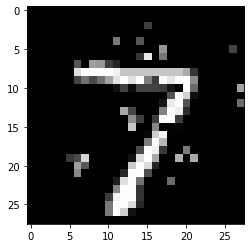

迭代: 57
置信度： 0.59929365


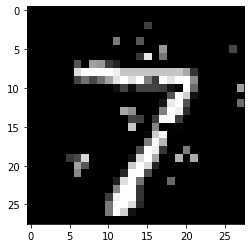

迭代: 58
置信度： 0.5688604


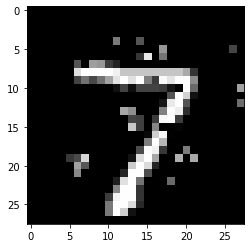

迭代: 59
置信度： 0.5647263


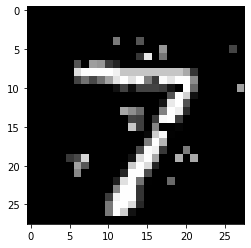

迭代: 60
置信度： 0.5542229


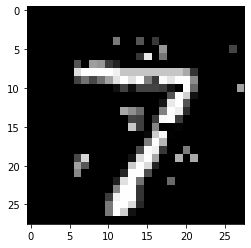

迭代: 61
置信度： 0.55368006


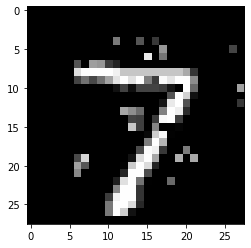

迭代: 62
置信度： 0.5407801


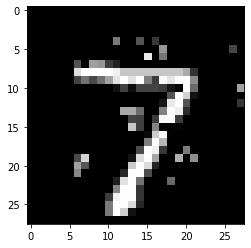

迭代: 63
置信度： 0.5243246


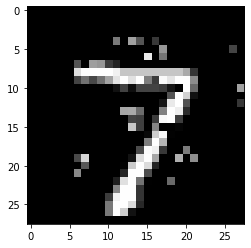

迭代: 64
置信度： 0.5239766


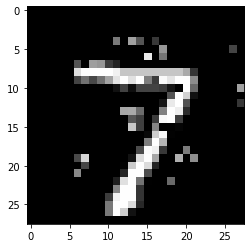

迭代: 65
置信度： 0.5239602


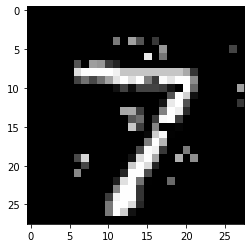

迭代: 66
置信度： 0.501119


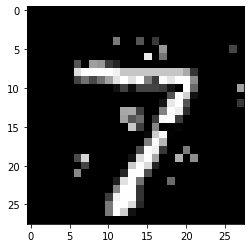

迭代: 67
置信度： 0.49143064


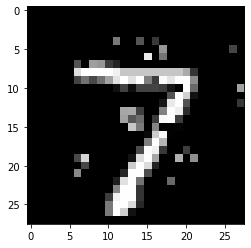

迭代: 68
置信度： 0.49069577


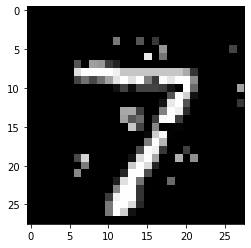

迭代: 69
置信度： 0.4817057


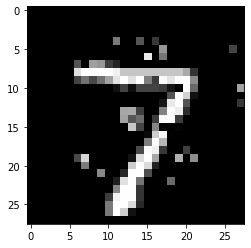

迭代: 70
置信度： 0.45578352


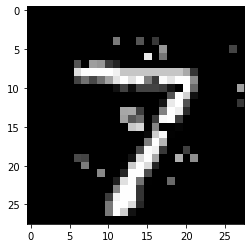

迭代: 71
置信度： 0.4452375


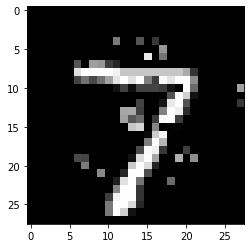

迭代: 72
置信度： 0.44323573


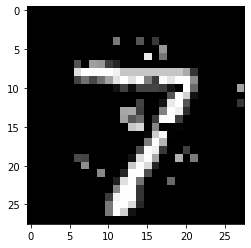

迭代: 73
置信度： 0.44240177


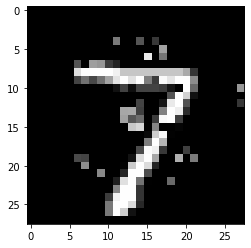

迭代: 74
置信度： 0.43317506


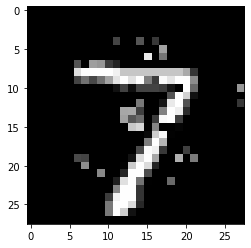

迭代: 75
置信度： 0.4282556


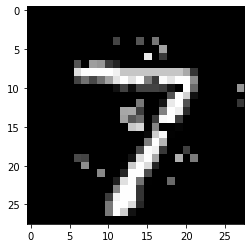

迭代: 76
置信度： 0.4235469


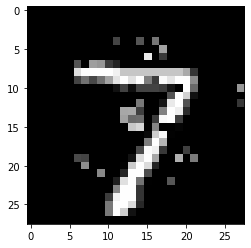

迭代: 77
置信度： 0.41645646


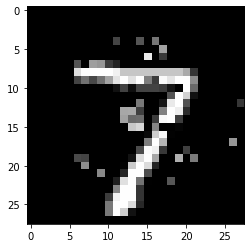

迭代: 78
置信度： 0.4096538


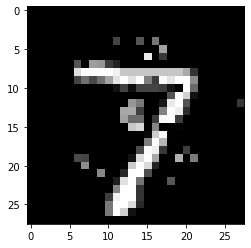

迭代: 79
置信度： 0.40962794


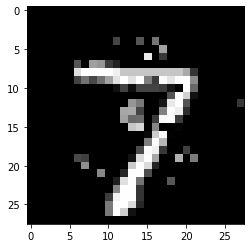

迭代失败


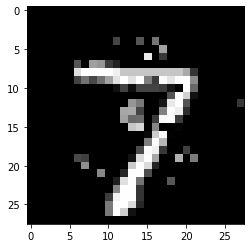

最终置信度： 0.40962794
[2.7765105e-03 2.5128899e-03 6.1476443e-02 4.7365698e-01 2.3857295e-04
 1.8119028e-02 4.6779096e-05 4.0962794e-01 2.3721693e-02 7.8232856e-03]


In [12]:
# 改变坐标减小置信度（过滤0.2）
import copy
x_t = copy.deepcopy(x_f)
count = 0
for t in range(80):
    x_f1 = copy.deepcopy(x_t)
    con = 0
    while con < 1000:
        for i in range(784):
            if x_f1[i] > 0:
                x= random.randint(0,10000)/10000
                if x <= 0.1:
                    x_z = x_f1[i]
                    y = random.randint(0,783)
                    f_y = x_f1[y]+x_test[0][i]/255
                    f_i = x_f1[i]+x_test[0][y]/255
                    if  f_y >= 1.00000000e+00 or f_i >= 1.00000000e+00:
                        while (f_y >= 1.00000000e+00 or f_y < 0.00000000e+00) or (f_i >= 1.00000000e+00 or f_i < 0.00000000e+00):
                            y = random.randint(0,783)
                            f_y = x_f1[y]+x_test[0][i]/255
                            f_i = x_f1[i]+x_test[0][y]/255
                    x_f1[i] = x_f1[y]
                    x_f1[y] = x_z
        #print(Func(x_f1))
        con += 1
        if Func(x_f1) < Func(x_t):
            x_t = x_f1
            count += 1
            print("迭代:",count)
            print("置信度：",Func(x_t))
            f1 = x_t+x_test[0]/255
            plt.imshow(f1.reshape(28,28),cmap='gray')
            plt.show()
            break
        x_f1 = copy.deepcopy(x_t)
    if con == 1000:
        print("迭代失败")
        break
f = x_t+x_test[0]/255
plt.imshow(f.reshape(28,28),cmap='gray')
plt.show()
res=model.predict(f.reshape(1,784))
print("最终置信度：", res[0][7])
print(res[0])

In [13]:
x_t

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [19]:
x_t=np.array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.26683196,  0.        ,
        0.        ,  0.33302523,  0.        ,  0.45903117,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.62894319,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.91455101,  0.        ,
        0.22397262,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.71158566,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.50008482, -0.75934845,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.92262139,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.58697358,
        0.47645839,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.21290605,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.65379384,  0.66239326,  0.26765718,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.62960732,
        0.41510936,  0.42212665,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.7794103 ,  0.83643386,
        0.        ,  0.        , -0.98998382, -0.72913378,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.21671596,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.24758811,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.28840254,  0.24955689,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.68482221,  0.        ,  0.48048063,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.55606177,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.53321169,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.33821372,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

In [20]:
#test
count = 0
for i in range(784):
    if x_t[i] != 0:
        count+=1
print(count)

32


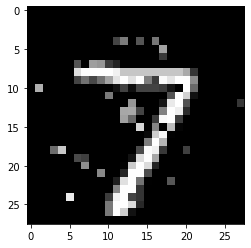

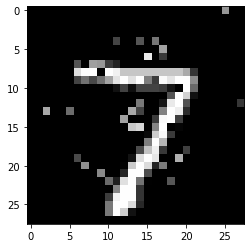

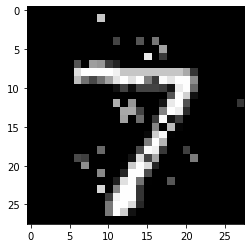

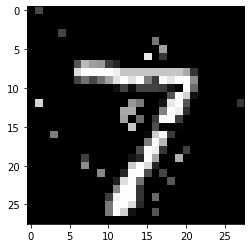

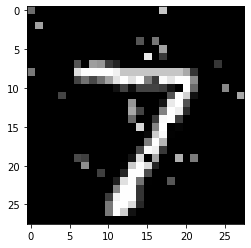

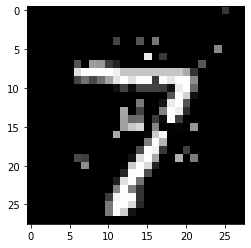

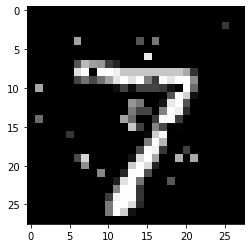

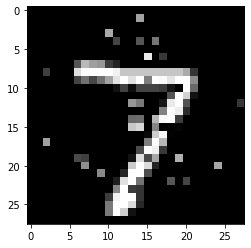

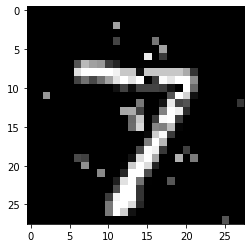

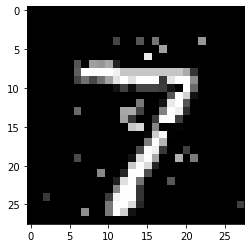

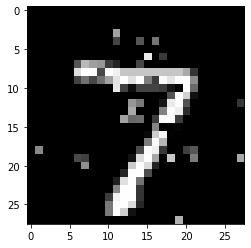

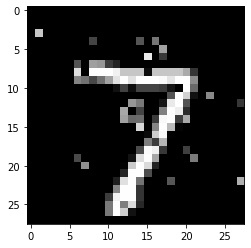

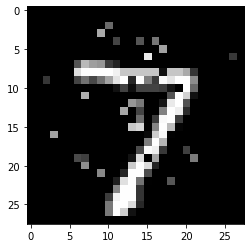

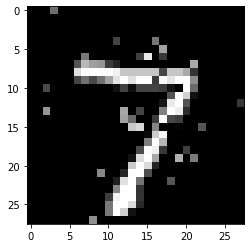

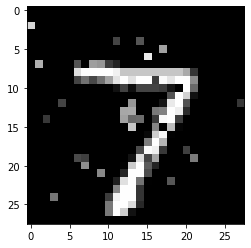

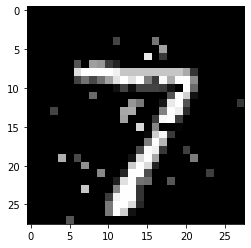

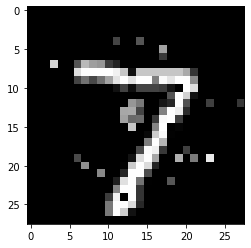

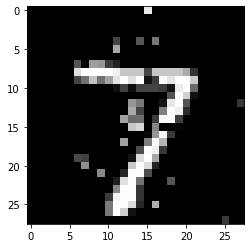

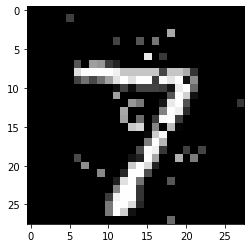

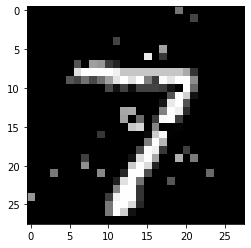

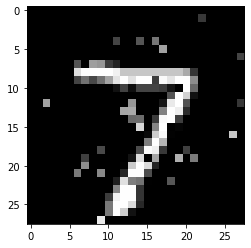

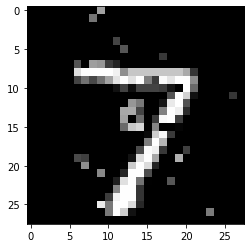

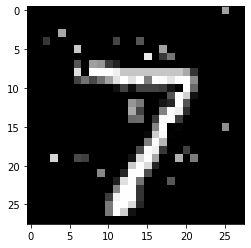

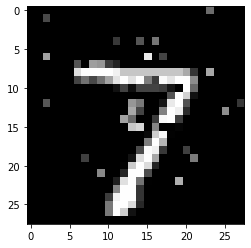

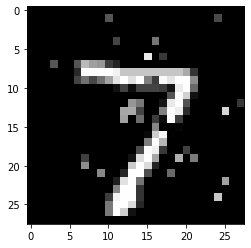

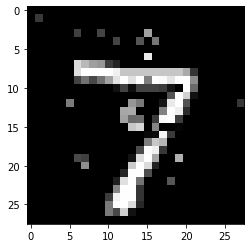

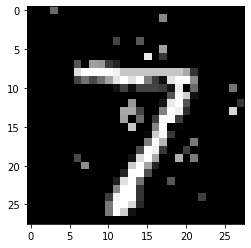

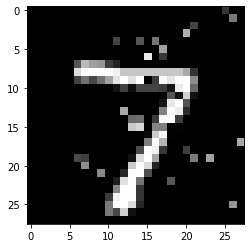

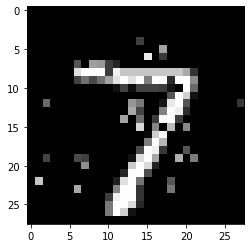

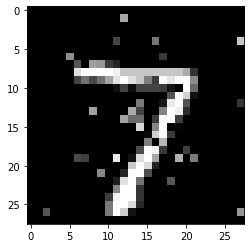

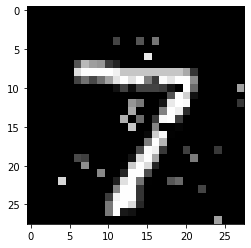

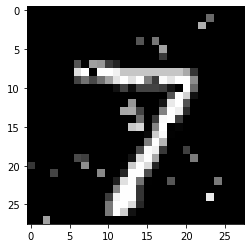

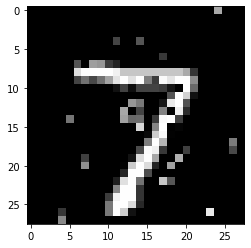

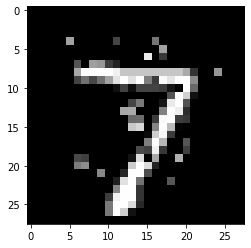

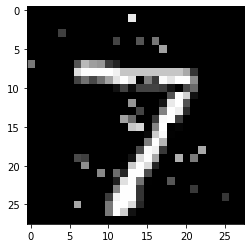

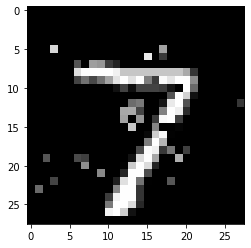

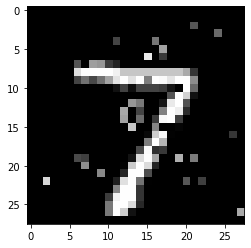

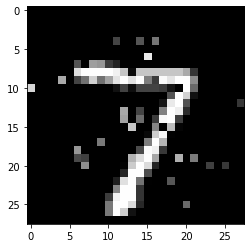

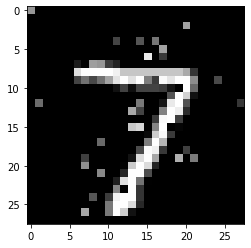

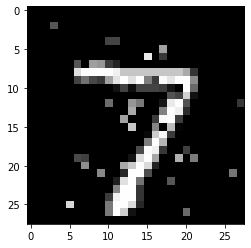

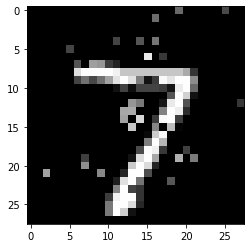

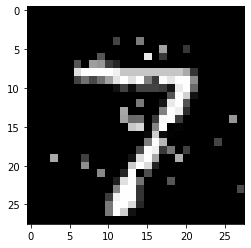

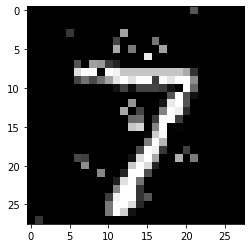

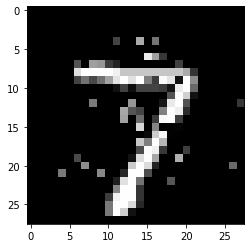

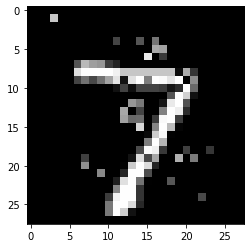

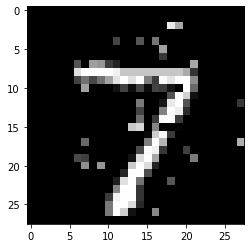

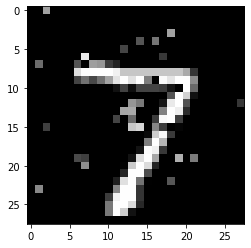

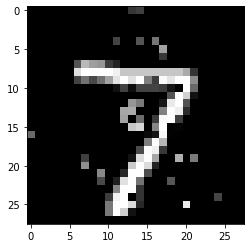

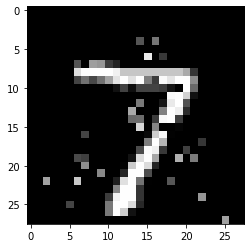

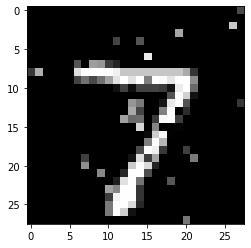

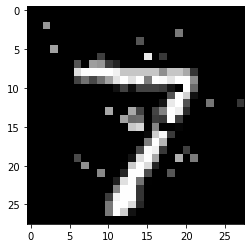

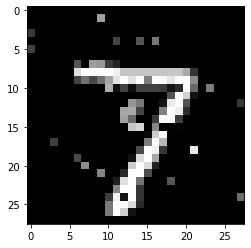

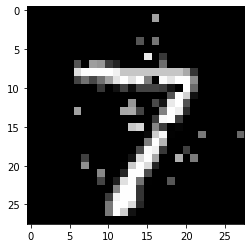

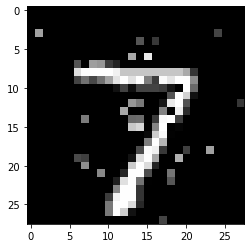

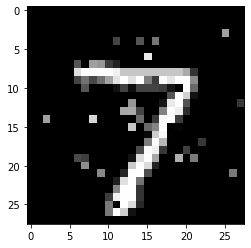

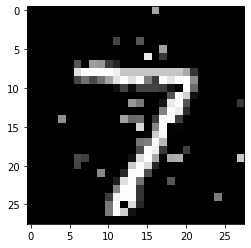

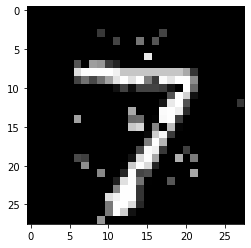

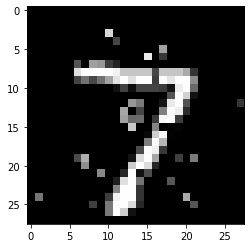

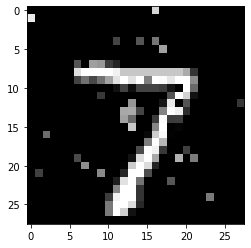

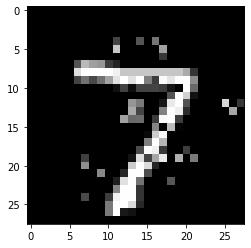

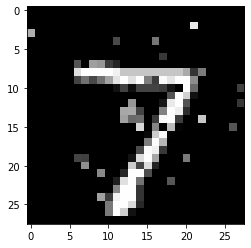

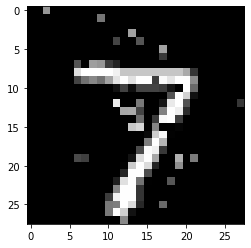

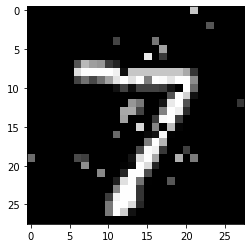

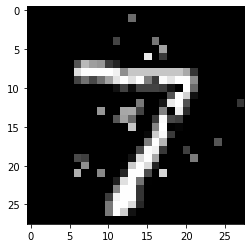

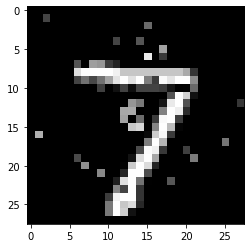

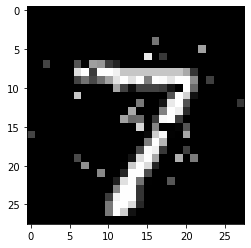

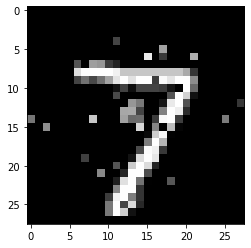

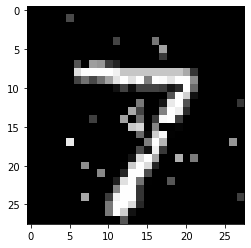

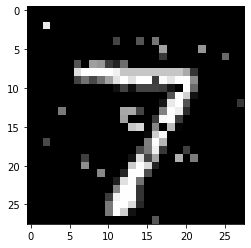

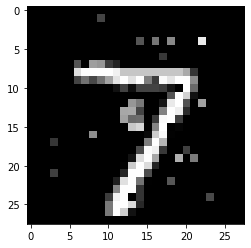

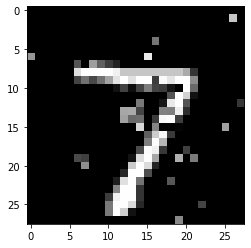

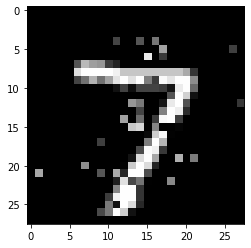

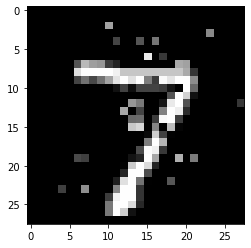

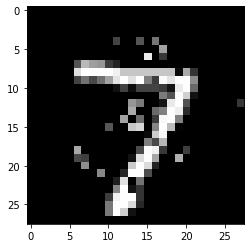

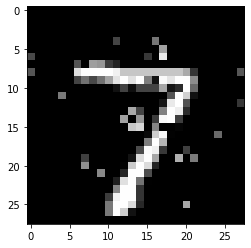

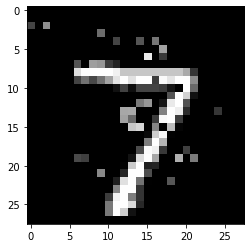

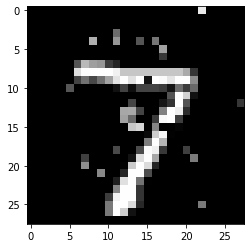

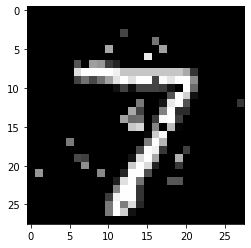

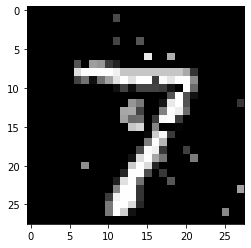

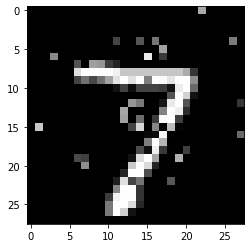

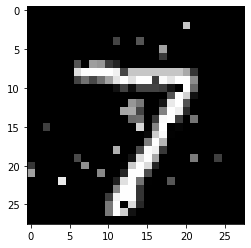

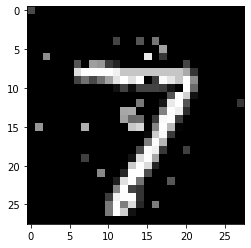

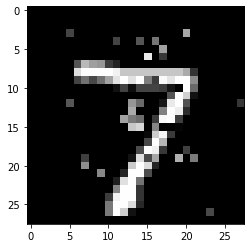

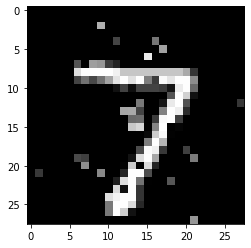

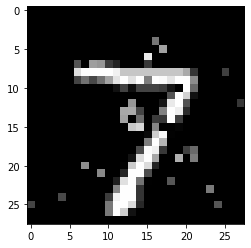

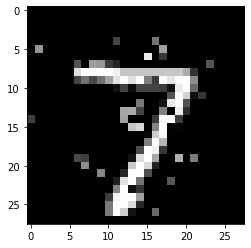

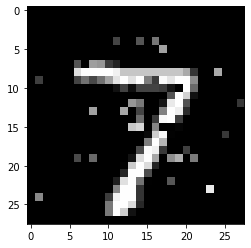

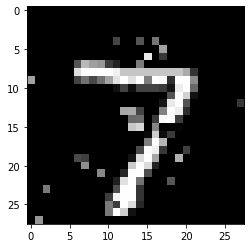

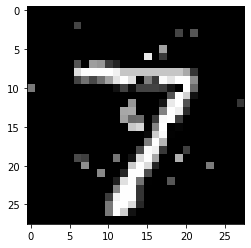

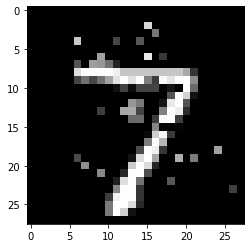

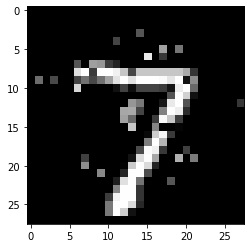

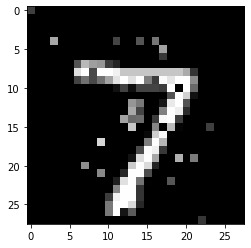

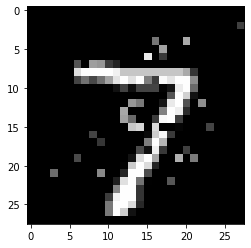

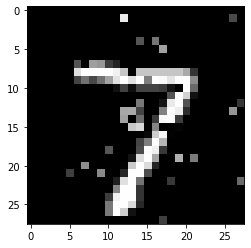

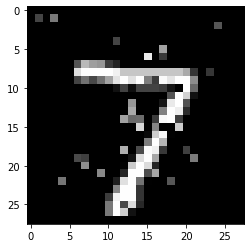

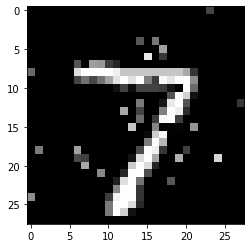

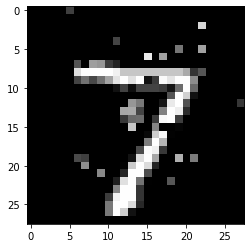

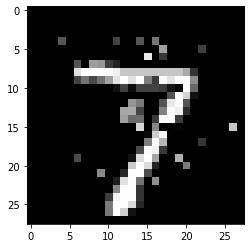

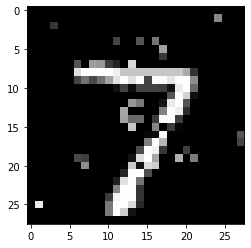

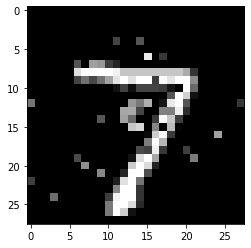

In [21]:
# 种群再次生成（不同攻击坐标）
import copy
x_t = np.array(x_t)
x_tmp_f = copy.deepcopy(x_t)
x_des_f = []
for r in range(100):
    for t in range(10):   # 交换攻击点个数
        i = random.randint(0,783)
        while x_tmp_f[i] == 0:
            i = random.randint(0,783)
        x_z = x_tmp_f[i]
        y = random.randint(0,783)
        tmp_y = x_tmp_f[y]+x_test[0][i]/255
        tmp_i = x_tmp_f[i]+x_test[0][y]/255
        if  (tmp_y >= 1.00000000e+00 or tmp_y < 0.00000000e+00) or (tmp_i >= 1.00000000e+00 or tmp_i < 0.00000000e+00):
            while (tmp_y >= 1.00000000e+00 or tmp_y < 0.00000000e+00) or (tmp_i >= 1.00000000e+00 or tmp_i < 0.00000000e+00):
                y = random.randint(0,783)
                tmp_y = x_tmp_f[y]+x_test[0][i]/255
                tmp_i = x_tmp_f[i]+x_test[0][y]/255
        x_tmp_f[i] = x_tmp_f[y]
        x_tmp_f[y] = x_z
    x_des_f.append(np.array(x_tmp_f.reshape(1,784)))
    x_re = x_tmp_f+x_test[0]/255
    re = x_re.reshape(28,28)
    plt.imshow(re,cmap='gray')
    plt.show()
    x_tmp_f = copy.deepcopy(x_t)

最优值： 0.5756464 扰动程度 11.844507614151702
最优值： 0.5128765 扰动程度 12.052168273331572
最优值： 0.5128765 扰动程度 12.052168273331572
最优值： 0.42301732 扰动程度 12.486931461437997
最优值： 0.4772197 扰动程度 11.512220446169806
最优值： 0.40919775 扰动程度 12.91754757431631
最优值： 0.42928138 扰动程度 13.300525052548496
最优值： 0.42624113 扰动程度 13.376887854917186
最优值： 0.42914385 扰动程度 13.128768315341068
最优值： 0.42656544 扰动程度 12.82666593682574
最优值： 0.4480837 扰动程度 12.07073260946871
最优值： 0.35837823 扰动程度 14.214659973834618
最优值： 0.26262438 扰动程度 13.488124559884511
最优值： 0.37855744 扰动程度 13.19779921694636
最优值： 0.39912027 扰动程度 12.26421513058402
最优值： 0.22268058 扰动程度 14.97952435976986
最优值： 0.2131794 扰动程度 15.005786488172195
最优值： 0.38684338 扰动程度 12.043469561336684
最优值： 0.47108915 扰动程度 11.764997763701718
最优值： 0.35032645 扰动程度 12.143648785833655
最优值： 0.23146297 扰动程度 14.097116468098664
最优值： 0.34401405 扰动程度 12.269984850589983
最优值： 0.35962602 扰动程度 12.812732886684204
最优值： 0.45900062 扰动程度 11.6534156217442
最优值： 0.43903112 扰动程度 11.870376070250027
最优值： 0.4447456

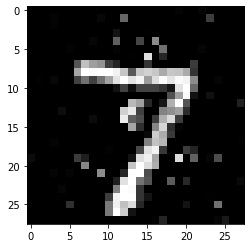

In [22]:
MAX_GENERATION = 100  # 最大迭代次数
GENERATION = 0  # 当前代数
L = 784  # 种子的维度
N = 100  # 种群规模
SIGMA = 0.333  # 缩放因子
CR = 0.1  # 交叉概率
T = 1
G = np.zeros(T)
for k in range(T):
        GENERATION = 0  # 当前代数
        BEST_X_F = 0
        FITS = np.zeros(N)
        FITS_U = np.zeros(N)
        DIS = np.zeros(N)
        DIS_U = np.zeros(N)
        V = np.zeros((N, L))
        U = np.zeros((N, L))
        # 1、初始化
        X = np.concatenate(x_des_f, axis=0)
        # 找出随机生成的最好的种子
        for i in range(N):
            FITS[i] = Func(X[i])
        # 找出最好的种子 适应度值最小
        BEST_X_F = X[np.argmin(FITS)]
        while GENERATION < MAX_GENERATION:       
            # 2、变异
            for i in range(N):
                r = np.random.randint(1, N, 2)
                # 变异向量V[i, :]
                # 变异向量的基使用每次适应度值最好的个体BEST_X
                # V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :]) + SIGMA * (X[r[2], :] - X[r[3], :])
                # V[i, :] = BEST_X + SIGMA * ((X[r[0], :] - X[r[1], :]) + (X[r[2], :] - X[r[3], :]))
                # SIGMA过大 无法收敛
                # SIGMA过小 早熟
                V[i, :] = BEST_X_F + SIGMA * (X[r[0], :] - X[r[1], :])
                for j in range(784):
                    if V[i, j] > 1:
                        #print(V[i, j])
                        V[i, j] = 1-(V[i, j]-1)
                        #print(V[i, j])
                    elif V[i, j] <= 1:
                        if V[i, j] + x_test[0][j]/255 > 1:
                            # V +t = 1-(V+t-1)
                            V[i, j] = 1-(V[i, j]+2*x_test[0][j]/255-1)
                            #print(V[i, j])
                        elif V[i, j] + x_test[0][j]/255 < 0:
                            V[i, j] = -x_test[0][j]/255
            # print(V)
            # 3、交叉操作
            for i in range(N):
                jRand = np.floor(np.random.random() * L)
                for j in range(L):
                    # 至少有一个分量对U[i,j]作出了贡献
                    # CR调小 有利于往BEST_X的方向进化
                    if np.random.random() > CR or j == jRand:
                        U[i, j] = X[i, j]
                    else:
                        U[i, j] = V[i, j]
                    #if np.random.random() < CR or j == jRand:
                        #U[i, j] = V[i, j]
                    #else:
                        #U[i, j] = X[i, j]
            # 4、计算适应度值+选择操作
            for i in range(N):
                FITS[i] = Func(X[i])
                FITS_U[i] = Func(U[i])
                DIS[i] = Dis(X[i])
                DIS_U[i] = Dis(U[i])
                # 变异的种子表现更好
                #if FITS[i] >= FITS_U[i] and DIS[i] >= DIS_U[i]:
                if Func(BEST_X_F) < 0.40000000:
                    if DIS[i] >= DIS_U[i]:
                        X[i, :] = U[i, :]
                        FITS[i] = FITS_U[i]
                        # 是否比BEST_X适应度值更小
                        #if FITS_U[i] < Func(BEST_X) and DIS_U[i] < Dis(BEST_X):
                        if DIS_U[i] < Dis(BEST_X_F):
                            BEST_X_F = U[i, :]
                elif Func(BEST_X_F) >= 0.40000000:
                    if FITS[i] >= FITS_U[i]:
                        X[i, :] = U[i, :]
                        FITS[i] = FITS_U[i]
                        #if FITS_U[i] < Func(BEST_X) and DIS_U[i] < Dis(BEST_X):
                        if FITS_U[i] < Func(BEST_X_F):
                            BEST_X_F = U[i, :]
            GENERATION += 1
            print("最优值：", Func(BEST_X_F),"扰动程度",Dis(BEST_X_F))
        if GENERATION == MAX_GENERATION:
            BEST_F = BEST_X_F+x_test[0]/255
            #print(BEST_X_F)
            plt.imshow(BEST_F.reshape(28,28),cmap='gray')
            plt.show()
            break

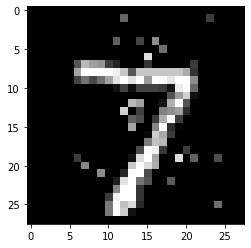

置信度： 0.79641724
[2.2961830e-03 1.2461114e-03 2.9925210e-02 1.5254138e-01 1.1634297e-04
 1.0009149e-02 1.8179915e-05 7.9641724e-01 4.1135699e-03 3.3166872e-03]


In [31]:
#过滤1
import copy
x_F = copy.deepcopy(BEST_X_F)
for i in range(784):
    if abs(x_F[i]) > 0.9 or abs(x_F[i]) < 0.2:
        x_F[i] = 0
F = x_F+x_test[0]/255
plt.imshow(F.reshape(28,28),cmap='gray')
plt.show()
result=model.predict(F.reshape(1,784))
print("置信度：", result[0][7])
print(result[0])

迭代: 1
置信度： 0.7807925


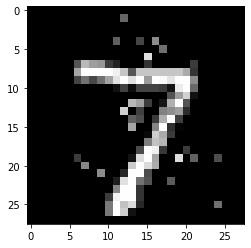

迭代: 2
置信度： 0.7776034


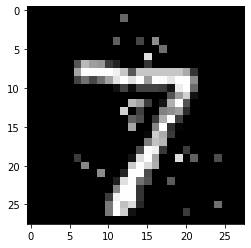

迭代: 3
置信度： 0.76663584


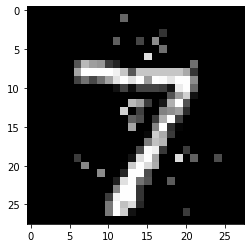

迭代: 4
置信度： 0.7503164


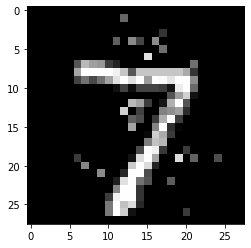

迭代: 5
置信度： 0.749123


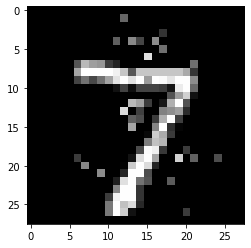

迭代: 6
置信度： 0.74644333


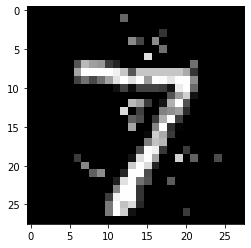

迭代: 7
置信度： 0.7461988


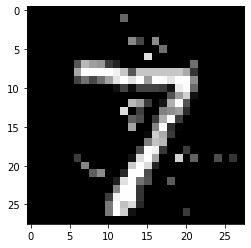

迭代: 8
置信度： 0.7419648


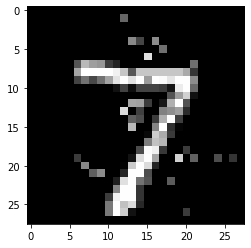

迭代: 9
置信度： 0.7416346


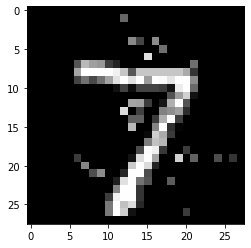

迭代: 10
置信度： 0.7400637


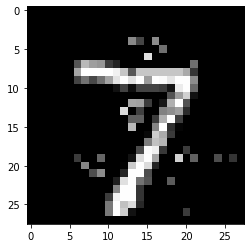

迭代: 11
置信度： 0.7291783


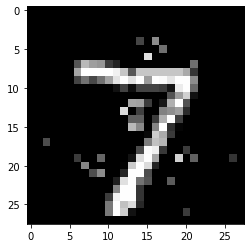

迭代: 12
置信度： 0.72204155


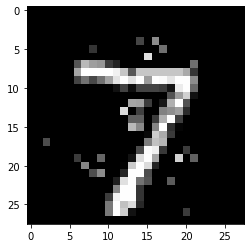

迭代: 13
置信度： 0.7201751


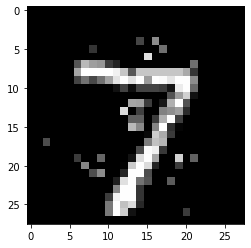

迭代: 14
置信度： 0.7086147


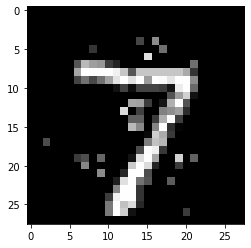

迭代: 15
置信度： 0.70548385


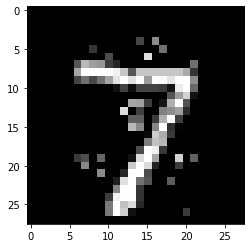

迭代: 16
置信度： 0.70075536


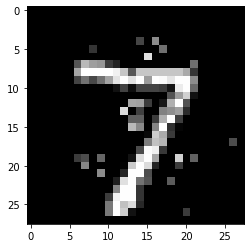

迭代: 17
置信度： 0.69822705


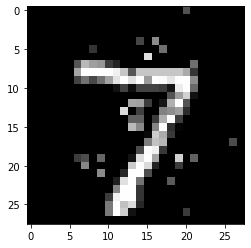

迭代: 18
置信度： 0.69710135


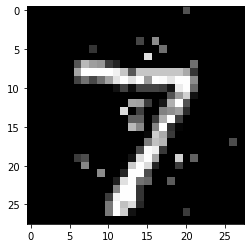

迭代: 19
置信度： 0.69568


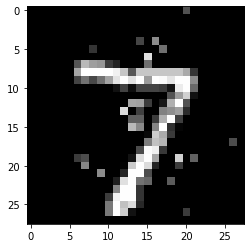

迭代: 20
置信度： 0.69289887


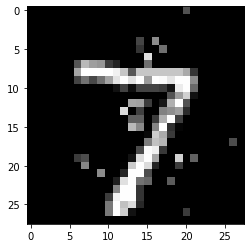

迭代: 21
置信度： 0.6831569


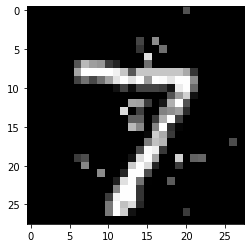

迭代: 22
置信度： 0.67950857


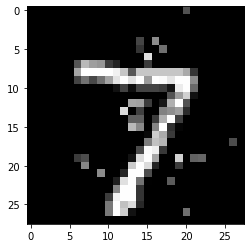

迭代: 23
置信度： 0.6765769


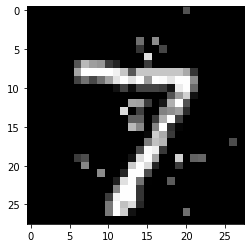

迭代: 24
置信度： 0.6701245


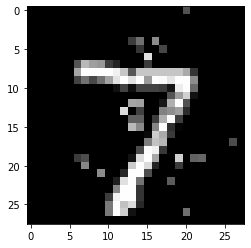

迭代: 25
置信度： 0.6692163


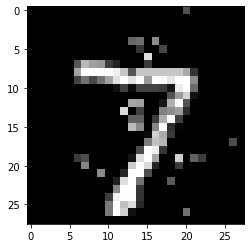

迭代: 26
置信度： 0.6284478


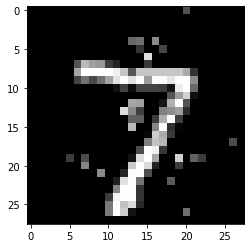

迭代: 27
置信度： 0.62089944


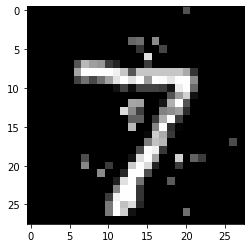

迭代: 28
置信度： 0.62018126


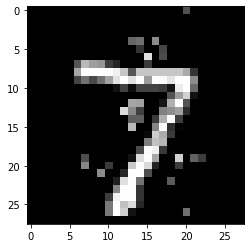

迭代: 29
置信度： 0.597666


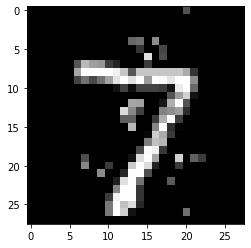

迭代: 30
置信度： 0.5932456


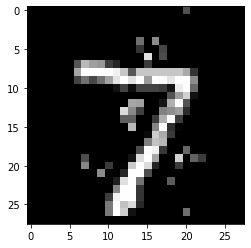

迭代: 31
置信度： 0.59155416


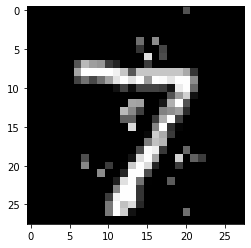

迭代: 32
置信度： 0.59152246


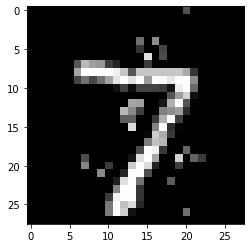

迭代: 33
置信度： 0.58344626


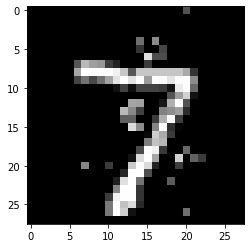

迭代: 34
置信度： 0.5806486


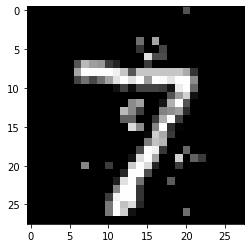

迭代: 35
置信度： 0.5790757


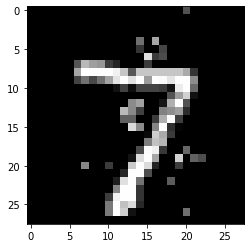

迭代失败


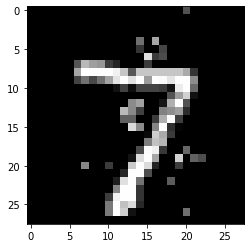

最终置信度： 0.5790757
[2.3139699e-03 1.7049602e-03 4.3669518e-02 3.4509337e-01 1.3081032e-04
 1.2643315e-02 2.4644885e-05 5.7907569e-01 9.9745803e-03 5.3691901e-03]


In [32]:
# 再次改变坐标减小置信度1
x_T = copy.deepcopy(x_F)
count = 0
for t in range(50):
    x_f1 = copy.deepcopy(x_T)
    con = 0
    while con < 1000:
        for i in range(784):
            if x_f1[i] > 0:
                x= random.randint(0,10000)/10000
                if x <= 0.1:
                    x_z = x_f1[i]
                    y = random.randint(0,783)
                    f_y = x_f1[y]+x_test[0][i]/255
                    f_i = x_f1[i]+x_test[0][y]/255
                    if  (f_y >= 1.00000000e+00 or f_y < 0.00000000e+00) or (f_i >= 1.00000000e+00 or f_i < 0.00000000e+00):
                        while (f_y >= 1.00000000e+00 or f_y < 0.00000000e+00) or (f_i >= 1.00000000e+00 or f_i < 0.00000000e+00):
                            y = random.randint(0,783)
                            f_y = x_f1[y]+x_test[0][i]/255
                            f_i = x_f1[i]+x_test[0][y]/255
                    x_f1[i] = x_f1[y]
                    x_f1[y] = x_z
        #print(Func(x_f1))
        con += 1
        if Func(x_f1) < Func(x_T):
            x_T = x_f1
            count += 1
            print("迭代:",count)
            print("置信度：",Func(x_T))
            f1 = x_T+x_test[0]/255
            plt.imshow(f1.reshape(28,28),cmap='gray')
            plt.show()
            break
        x_f1 = copy.deepcopy(x_T)
    if con == 1000:
        print("迭代失败")
        break
f = x_T+x_test[0]/255
plt.imshow(f.reshape(28,28),cmap='gray')
plt.show()
res=model.predict(f.reshape(1,784))
print("最终置信度：", res[0][7])
print(res[0])

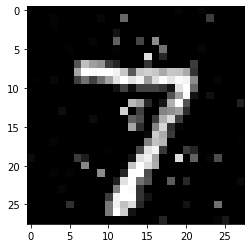

置信度： 0.6838617
[2.7936406e-03 1.6515640e-03 4.1615490e-02 2.4623717e-01 1.5144261e-04
 1.2249691e-02 2.3773007e-05 6.8386167e-01 6.8689315e-03 4.5466269e-03]


In [35]:
#过滤2
import copy
x_F = copy.deepcopy(BEST_X_F)
for i in range(784):
    if abs(x_F[i]) > 0.9:
        x_F[i] = 0
F = x_F+x_test[0]/255
plt.imshow(F.reshape(28,28),cmap='gray')
plt.show()
result=model.predict(F.reshape(1,784))
print("置信度：", result[0][7])
print(result[0])

迭代: 1
置信度： 0.67708933


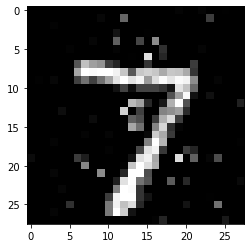

迭代: 2
置信度： 0.67500484


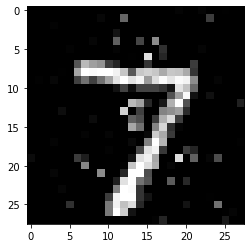

迭代: 3
置信度： 0.6696512


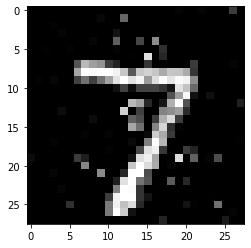

迭代: 4
置信度： 0.66155213


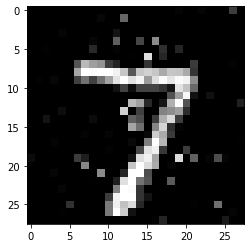

迭代: 5
置信度： 0.66092616


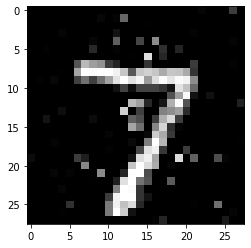

迭代: 6
置信度： 0.65241176


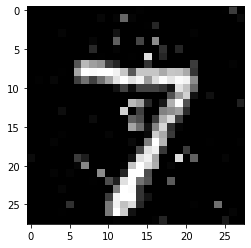

迭代: 7
置信度： 0.651831


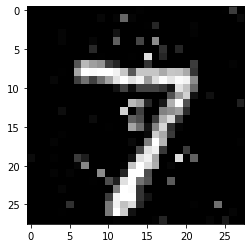

迭代: 8
置信度： 0.6483214


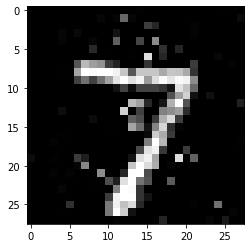

迭代: 9
置信度： 0.64333695


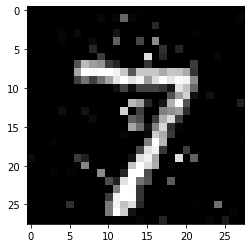

迭代: 10
置信度： 0.6085883


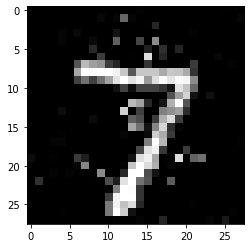

迭代: 11
置信度： 0.6017364


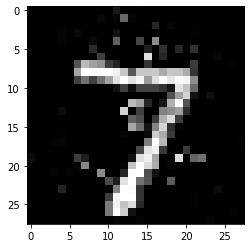

迭代: 12
置信度： 0.60003674


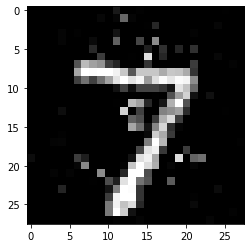

迭代: 13
置信度： 0.59740555


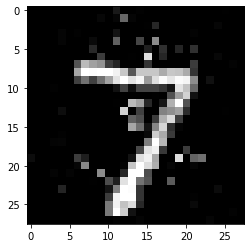

迭代: 14
置信度： 0.5973508


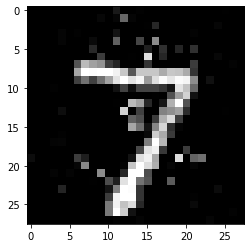

迭代: 15
置信度： 0.59316087


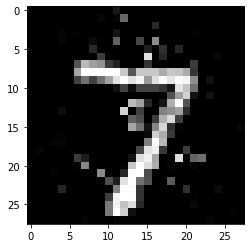

迭代: 16
置信度： 0.5882055


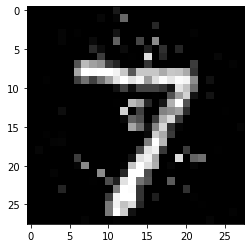

迭代: 17
置信度： 0.5877165


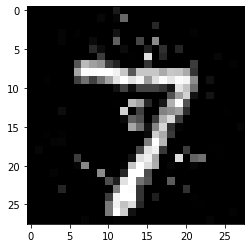

迭代: 18
置信度： 0.5867813


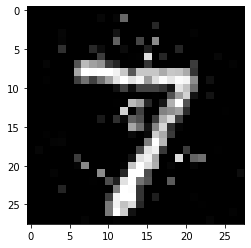

迭代: 19
置信度： 0.5844521


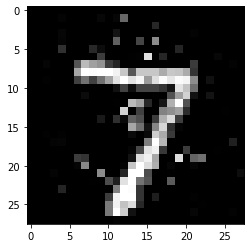

迭代: 20
置信度： 0.5843272


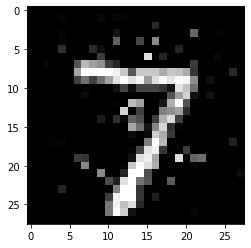

迭代: 21
置信度： 0.58261776


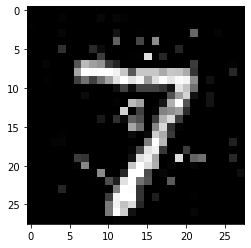

迭代: 22
置信度： 0.5733926


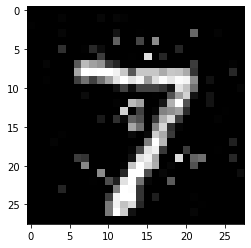

迭代: 23
置信度： 0.56493145


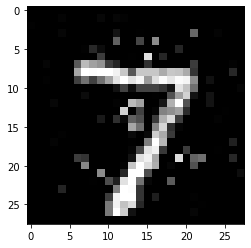

迭代: 24
置信度： 0.54889077


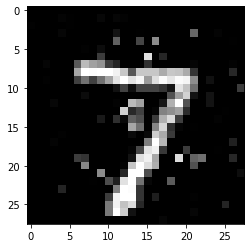

迭代: 25
置信度： 0.5487678


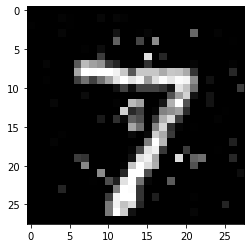

迭代: 26
置信度： 0.54844725


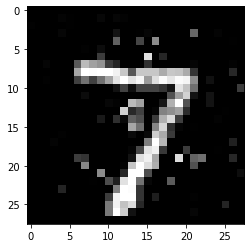

迭代: 27
置信度： 0.54781103


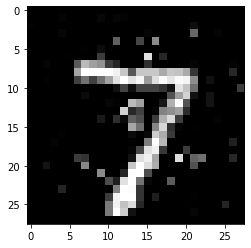

迭代: 28
置信度： 0.5257506


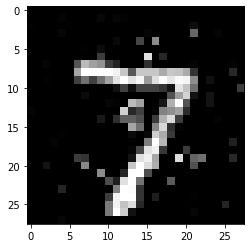

迭代: 29
置信度： 0.5230825


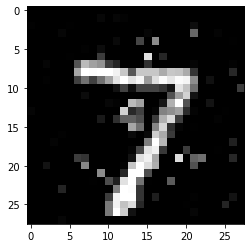

迭代: 30
置信度： 0.48571348


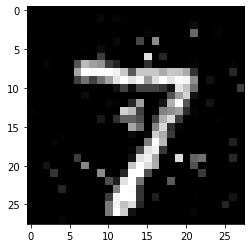

迭代: 31
置信度： 0.476743


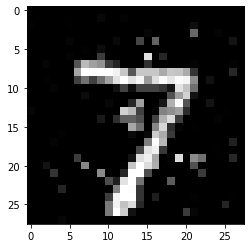

迭代: 32
置信度： 0.4745651


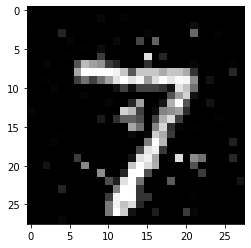

迭代: 33
置信度： 0.47161406


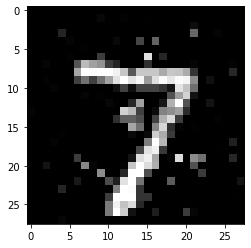

迭代: 34
置信度： 0.46888953


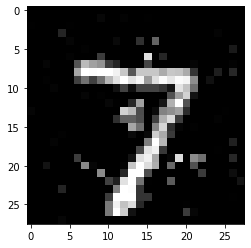

迭代: 35
置信度： 0.46762854


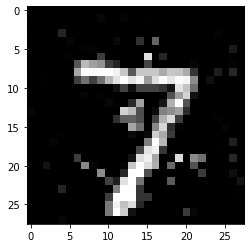

迭代: 36
置信度： 0.46701637


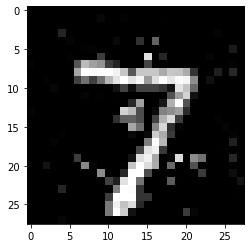

迭代: 37
置信度： 0.46607998


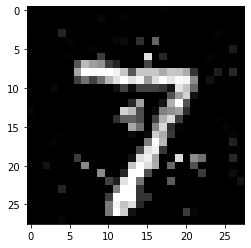

迭代: 38
置信度： 0.46136633


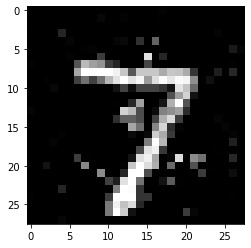

迭代: 39
置信度： 0.46035293


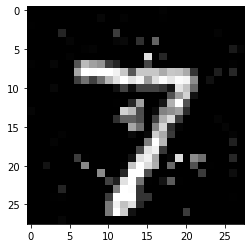

迭代: 40
置信度： 0.4603437


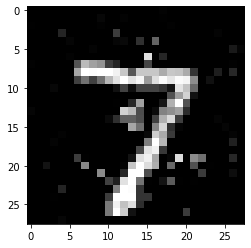

迭代: 41
置信度： 0.45888618


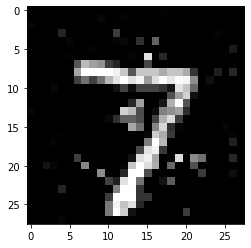

迭代: 42
置信度： 0.45561334


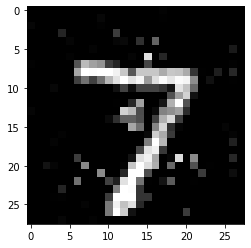

迭代: 43
置信度： 0.4536012


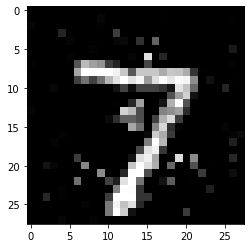

迭代: 44
置信度： 0.44878677


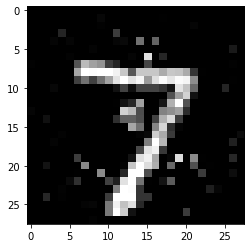

迭代: 45
置信度： 0.44850773


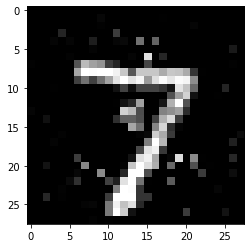

迭代: 46
置信度： 0.44737154


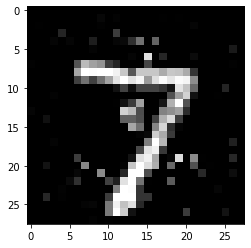

迭代: 47
置信度： 0.44290924


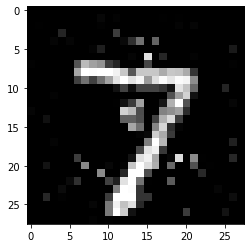

迭代: 48
置信度： 0.44223645


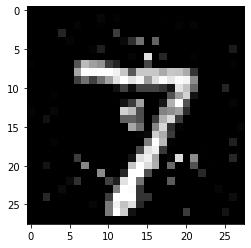

迭代: 49
置信度： 0.43806612


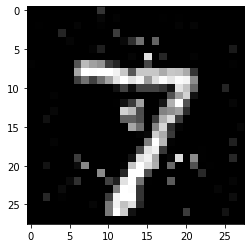

迭代: 50
置信度： 0.43721402


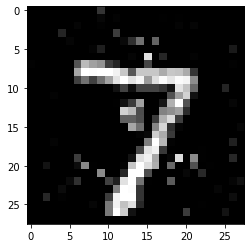

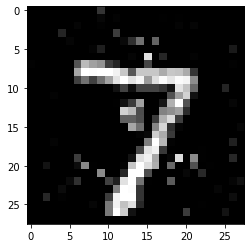

最终置信度： 0.43721402
[2.3917239e-03 2.0756011e-03 6.0082138e-02 4.6719247e-01 1.5092781e-04
 1.5783167e-02 2.9039473e-05 4.3721402e-01 9.9645900e-03 5.1164022e-03]


In [34]:
# 再次改变坐标减小置信度2
x_T = copy.deepcopy(x_F)
count = 0
for t in range(50):
    x_f1 = copy.deepcopy(x_T)
    con = 0
    while con < 1000:
        for i in range(784):
            if x_f1[i] > 0:
                x= random.randint(0,10000)/10000
                if x <= 0.1:
                    x_z = x_f1[i]
                    y = random.randint(0,783)
                    f_y = x_f1[y]+x_test[0][i]/255
                    f_i = x_f1[i]+x_test[0][y]/255
                    if  (f_y >= 1.00000000e+00 or f_y < 0.00000000e+00) or (f_i >= 1.00000000e+00 or f_i < 0.00000000e+00):
                        while (f_y >= 1.00000000e+00 or f_y < 0.00000000e+00) or (f_i >= 1.00000000e+00 or f_i < 0.00000000e+00):
                            y = random.randint(0,783)
                            f_y = x_f1[y]+x_test[0][i]/255
                            f_i = x_f1[i]+x_test[0][y]/255
                    x_f1[i] = x_f1[y]
                    x_f1[y] = x_z
        #print(Func(x_f1))
        con += 1
        if Func(x_f1) < Func(x_T):
            x_T = x_f1
            count += 1
            print("迭代:",count)
            print("置信度：",Func(x_T))
            f1 = x_T+x_test[0]/255
            plt.imshow(f1.reshape(28,28),cmap='gray')
            plt.show()
            break
        x_f1 = copy.deepcopy(x_T)
    if con == 1000:
        print("迭代失败")
        break
f = x_T+x_test[0]/255
plt.imshow(f.reshape(28,28),cmap='gray')
plt.show()
res=model.predict(f.reshape(1,784))
print("最终置信度：", res[0][7])
print(res[0])